# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: K__

__Nombres de los estudiantes: Lucía Alonso Mozo y Javier Amado Lázaro__

In [54]:
## Si no lo tienes instalado, puedes hacerlo desde el notebook
import sys

!{sys.executable} -m pip install google

# Asumismos instalado wdsparql
%load_ext autoreload
%load_ext wdsparql
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The wdsparql extension is already loaded. To reload it, use:
  %reload_ext wdsparql


In [55]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [56]:
# acceso a google drive

#from google.colab import drive
#drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [57]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA2/p2/2324/housing.csv')
df = pd.read_csv('./housing/housing.csv')
df = df.dropna().reset_index(drop = True) #eliminamos las filas con valores nulos.

# Haciendo una copia de una selección
mi_copia2 = df.iloc[0:,].copy()

df


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                25.0       1665.0           374.0   
20429    -121.21     39.49                18.0        697.0           150.0   
20430    -121.22     39.43                17.0       2254.0           485.0   
20431    -121.32     39.43                18.0       1860.0           409.0   
20432    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20428       845.0       330.0         1.5603             78100.0   
20429       356.0       114.0         2.5568             77100.0   
20430      1007.0       433.0         1.7000             92300.0   
20431       741.0       349.0         1.8672             84700.0   
20432      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20428          INLAND  
20429          INLAND  
20430          INLAND  
20431          INLAND  
20432          INLAND  

[20433 rows x 10 columns]

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [58]:
df.describe().transpose()

count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0       3.871162       1.899291      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   

                            25%          50%         75%          max  
longitude             -121.8000    -118.4900    -118.010    -114.3100  
latitude                33.9300      34.2600      37.720      41.9500  
housing_median_age      18.0000      29.0000      37.000      52.0000  
total_rooms           1450.0000    2127.0000    3143.000   39320.0000  
total_bedrooms         296.0000     435.0000     647.000    6445.0000  
population             787.0000    1166.0000    1722.000   35682.0000  
households             280.0000     409.0000     604.000    6082.0000  
median_income            2.5637       3.5365       4.744      15.0001  
median_house_value  119500.0000  179700.0000  264700.000  500001.0000

Para cada una de las variables numéricas, se ha realizado un análisis estadístico que incluye la media, la desviación estándar, el valor mínimo observado, los percentiles y los valores máximos.

* Longitud (distancia al oeste desde un punto de referencia): La media se sitúa en -119, y la desviación estándar indica una baja variabilidad entre los barrios en términos de distancia. El rango de valores oscila entre -124.35 y -114.31.

* Latitud (distancia al norte desde un punto de referencia): Con una media de 35, y una desviación estándar baja, también se observa una proximidad geográfica entre los barrios. El rango de valores latitudinales abarca desde 32.5 hasta 41.95.

* Antigüedad media de las viviendas en la manzana: La media de edad de las viviendas es de 28 años, lo que sugiere que, en promedio, las viviendas son relativamente antiguas. Sin embargo, la presencia de viviendas de diversas edades, desde recientes hasta con más de medio siglo de antigüedad, junto con una desviación estándar elevada, indica una variedad en la edad de las viviendas dentro de la manzana.

* Total de habitaciones en la manzana: Con una media aproximada de 2600 habitaciones por manzana, la alta varianza (2185) refleja una distribución muy dispersa en el número de habitaciones, evidenciado por un rango que va desde 2 hasta 39320 habitaciones.

* Total de dormitorios en la manzana: La cantidad media de dormitorios por manzana es de alrededor de 537, aunque la variabilidad es alta, desde 1 dormitorio hasta 6455, según el rango observado.

* Población total en la manzana: La población varía en un rango de 3 a 35682 personas, con una desviación estándar significativa. La media de personas por manzana es de 1424.

* Hogares totales en la manzana: El número de hogares varía ampliamente, con un rango entre 1 y 6082, y una media de 500 hogares por manzana.

* Ingreso medio de los hogares en la manzana: La media de ingresos es de 30.000 dólares estadounidenses, con un rango que va desde 4999 hasta 150.000 dólares. Esta amplia dispersión en los ingresos se refleja en una desviación estándar elevada.

* Valor medio de la vivienda en la manzana: Con una media de aproximadamente 206864 dólares, y un rango entre 14999 y 500001 dólares, se evidencia una dispersión significativa en los valores de las viviendas, reflejada en una desviación estándar elevada.

* Proximidad al océano: Aunque no es una variable numérica, se incluyen los tipos posibles: <1H OCEAN, NEAR BAY, NEAR OCEAN, INLAND.

Es importante añadir que no hemos comentado los percentiles de todas las variables numéricas, porque es solo copiar el valor. Básicamente, el percentil de 25% indica el valor por debajo del cual cae el 25% de las observaciones, el 50% es la mediana, diviendo los datos en dos partes iguales, y el 75% es el valor por debajo del cual caen el 75% de las observaciones. Todos estos valores de percentil están contenidos entre el mínimo y el máximo de los datos. Son útiles para comprender cómo se distribuyen los datos y para identificar posibles valores atípicos o extremos en el conjunto de datos. Como podemos observar, los 50% y las medias son valores muy parecidos, lo que quiere decir que no destacan los extremos en el conjunto de datos, pues de ser así, la media se vería afectada por ellos, y no es el caso.

Para buscar las relaciones entre pares de variables realizamos diagrama de dispersión y los coeficientes de correlación.

### Coeficientes de correlación entre TODAS las variables (dos a dos).

In [59]:
df.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

El análisis de correlación entre las variables de la tabla superior revela las siguientes relaciones:

* Mayor correlación positiva: Se observa una fuerte correlación positiva entre el número de ocupantes por manzana y el número total de dormitorios en ella. Esta asociación tiene sentido, ya que es razonable esperar que una mayor cantidad de personas viviendo en una manzana se refleje en un mayor número de dormitorios disponibles. De manera similar, se encuentra una correlación positiva significativa entre el número total de habitaciones en una manzana y el número total de dormitorios en ella. Esto se debe a que, generalmente, una mayor cantidad de habitaciones indica una mayor capacidad de alojamiento, lo que podría traducirse en un mayor número de dormitorios para acomodar a los residentes.

* Mayor correlación negativa: Esta se evidencia entre la longitud y la latitud. Esta relación implica que a medida que una variable aumenta, la otra disminuye de manera proporcional. Dado que la longitud representa la distancia este-oeste y la latitud representa la distancia norte-sur, inicialmente podría parecer sorprendente que estas variables estén tan correlacionadas negativamente, ya que las ubicaciones de las casas podrían distribuirse en cualquier dirección geográfica.

* Variables con menor correlación entre ellas: Se identifica una correlación muy baja entre el número de personas que viven en la manzana y la ganancia media de los ocupantes de la vivienda, con un índice de correlación de 0.005087. Esta asociación insignificante sugiere que no existe una relación lineal clara entre la población de una manzana y los ingresos medios de sus residentes. Es importante tener en cuenta que la falta de correlación no implica necesariamente una falta de relación entre las variables, ya que podría existir una relación no lineal o influencias de otros factores que no se capturan mediante el coeficiente de correlación lineal.

## Grafos de dispersión

### Grafo de dispersión del número total de habitaciones contra el número total de dormitorios por manzana.

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

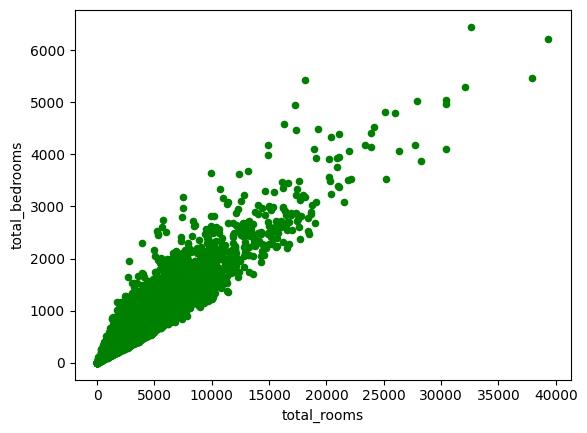

In [60]:
# hemos seleccionado dos variables de ejemplo para observar su diagrama de dispersión (total rooms vs total bedrooms)
df.plot.scatter(x='total_rooms', y='total_bedrooms', c='Green')

Para poder distinguir e identificar de forma más sencilla y obvia los datos que estamos viendo en la gráfica, les damos color a los puntos dependiendo de su situación geográfica.

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

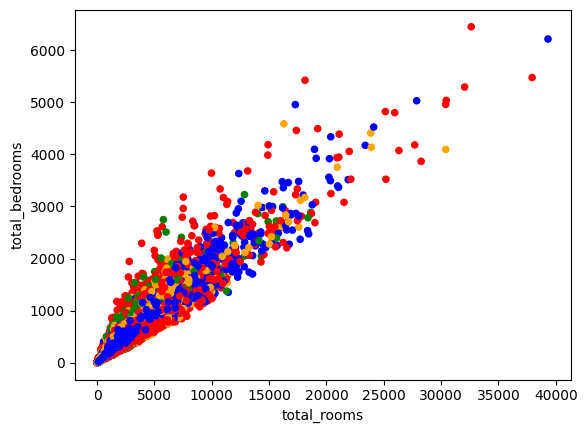

In [61]:
# hagamos también el diagrama de dispersión entre el sueldo de las personas con lo que cuesta cada casa en la manzana
# (variables que intuitivamente tienen relación entre ellas).

# Podemos usar el color como tercera dimensión para ver cómo se distribuyen los individuos de cada una de las clases
dic_colors = { 'INLAND': 'blue', '<1H OCEAN': 'red', 'NEAR OCEAN': 'orange', 'NEAR BAY': 'green', 'ISLAND': 'yellow'}
colors = df['ocean_proximity'].map(dic_colors)

# diagrama de dispersión de total_rooms con total_bedrooms
df.plot.scatter(x='total_rooms', y='total_bedrooms', c=colors)

Tras examinar el gráfico, hemos identificado una relación lineal entre el número de habitaciones y el número de dormitorios en una manzana. Esto sugiere que, en promedio, existe una proporción constante de dormitorios por cada conjunto de habitaciones, independientemente de la ubicación geográfica de la manzana. Esta relación lineal indica que, en términos generales, el número de dormitorios tiende a aumentar de manera proporcional al número de habitaciones, sin que los puntos sugieran ninguna variación significativa en esta tendencia en diferentes áreas geográficas de la manzana.

### Grafo de dispersión de las ganancias de los ocupantes de una manzana entre lo que cuesta las casas en dicha manzana.

<Axes: xlabel='median_house_value', ylabel='median_income'>

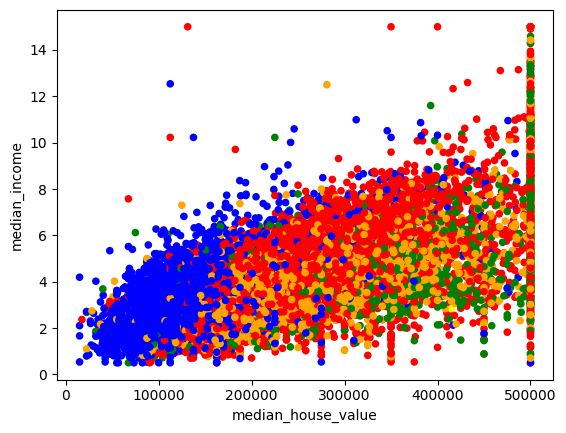

In [62]:
# Podemos usar el color como tercera dimensión para ver cómo se distribuyen los individuos de cada una de las clases
dic_colors = { 'INLAND': 'blue', '<1H OCEAN': 'red', 'NEAR OCEAN': 'orange', 'NEAR BAY': 'green'}
colors = df['ocean_proximity'].map(dic_colors)

# nos vemos obligados a hacer esto porque hay 3 valores que no detecta como INLAND, <1H OCEAN, NEAR OCEAN; o NEAR BAY
# hacemos que los que no se correspondan con ninguno de estos se les ponga el color amarillo por defecto.
for key, values in colors.items():
 if(values != 'blue' and values != 'orange' and values != 'green' and values != 'red'):
   colors[key] = 'yellow'

# diagrama de dispersión de median_house_value con median_income
df.plot.scatter(x='median_house_value', y='median_income', c=colors)

De manera intuitiva, al observar el gráfico superior, se evidencia que las viviendas representadas en color azul, que se ubican en el interior, están asociadas a ocupantes con ingresos inferiores y, además, presentan valores de vivienda más bajos. Por otro lado, las viviendas cercanas al océano, identificadas en color naranja, destacan por tener características intermedias: sus residentes poseen ingresos medianos en comparación con el resto de la población, y los precios de las viviendas varían ampliamente, desde opciones económicas hasta propiedades de mayor valor. Al considerar los puntos representados en color rojo, que indican viviendas a menos de una hora del océano, se observa también una amplia gama de precios, pero los residentes tienden a tener ingresos más altos en comparación con aquellos que residen cerca del océano. Por último, al analizar los puntos verdes que simbolizan las viviendas cercas de la bahía, se aprecia claramente que estas poseen valores más elevados; no obstante, sus ocupantes únicamente perciben ingresos ligeramente superiores en relación con los residentes de las viviendas representadas por puntos rojos.

### Grafo de dispersión de la latitud con la longitud.

Otro diagrama que resulta significativo es aquel que relaciona la latitud con la longitud. Al observar este gráfico, es evidente la coherencia entre la distribución espacial de los puntos y los colores que los representan. Los puntos de color naranja, cercanos al océano, delinean la costa de manera notable, seguidos por los puntos rojos que indican la proximidad al océano en menos de una hora. También se observa un conjunto compacto de puntos verdes, probablemente ubicados cerca de una bahía, lo que sugiere su presencia en esa zona geográfica. Por último, los puntos azules, que representan las viviendas ubicadas en el interior, completan el conjunto.

Esta relación entre la latitud, la longitud y la ubicación geográfica de las viviendas evidencia la interconexión entre estas tres variables. Por consiguiente, podría argumentarse que, en ciertos contextos, una de las variables de posición geográfica (ya sea latitud-longitud o proximidad al océano) podría considerarse redundante o prescindible, dado que la información proporcionada por una podría inferirse a partir de la otra.

<Axes: xlabel='latitude', ylabel='longitude'>

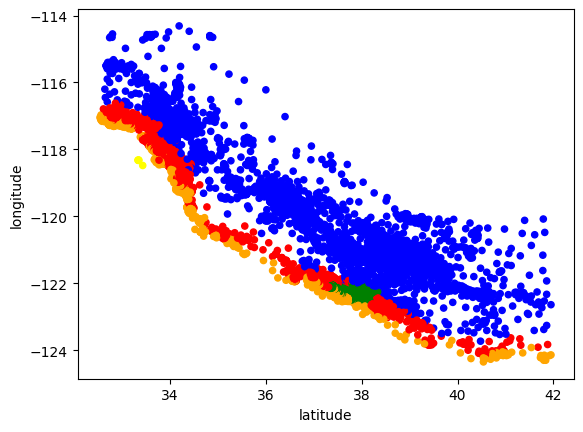

In [63]:
# diagrama de dispersión entre latitud y longitud
df.plot.scatter(x='latitude', y='longitude', c=colors)

### Grafo de dispersión entre la edad media de las casas de la manzana y el coste de la casa.

Intuitivamente, las casas que sean más antiguas deberán costar menos dinero. Veamos si se corresponde con el gráfico.

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

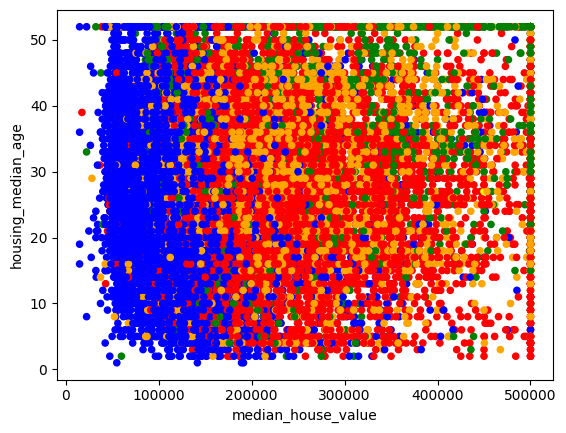

In [64]:
# diagrama de dispersión entre latitud y longitud
df.plot.scatter(x='median_house_value', y='housing_median_age', c=colors)

Vemos claramente una discrepancia entre nuestra teoría y los resultados del gráfico. La representación visual claramente muestra que las viviendas en el interior son las más asequibles, mientras que las ubicadas cerca de la bahía son las más costosas. Respecto a las viviendas cercanas al océano o a menos de una hora de él, no se observa una diferencia de precios tan marcada.

Además, el gráfico indica que, independientemente de la ubicación geográfica y del precio que cuestan, hay tanto viviendas antiguas como modernas. Esto se evidencia por las líneas verticales que representan las diferentes edades de las viviendas en cada tipo de ubicación.

Estos resultados sugieren que la antigüedad de las viviendas no está necesariamente ligada a su ubicación geográfica ni a su precio.

### Grafo de dispersión de número de habitantes (households) con la longitud

<Axes: xlabel='longitude', ylabel='households'>

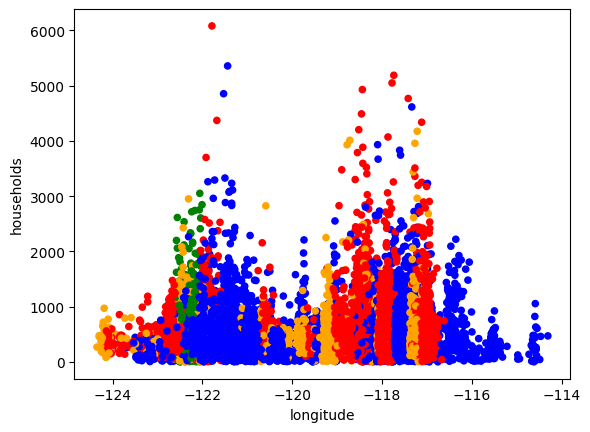

In [65]:
# diagrama de dispersión entre latitud y longitud
df.plot.scatter(x='longitude', y='households', c=colors)

De acuerdo con la representación gráfica presentada, se puede inferir que existe una concentración notable de población en las longitudes aproximadas de -122 y -118. Se evidencian dos picos distintivos en el gráfico, separados por un valle, situado en torno a la longitud -120, y flanqueados por reducciones en la densidad poblacional a ambos lados de dichos pichos. Esta distribución puede comprenderse dentro del contexto geográfico, sugiriendo que las áreas urbanas o pobladas están predominantemente ubicadas en las longitudes -122 y -118, mientras que las zonas periféricas presentan una menor densidad demográfica, posiblemente constituidas por áreas residenciales más dispersas o pequeñas comunidades intermedias.

### Grafo de dispersión entre TODAS las variables

Dado el amplio conjunto de variables disponibles para su comparación, aunque generalmente se sugiere limitar los gráficos que representan la relación entre todas las variables cuando se trata de un número reducido, hemos optado por incluirlos para obtener una visión exhaustiva de las interacciones entre ellas.

Este enfoque nos permitirá explorar las relaciones entre cada par de variables, lo que podría revelar patrones, tendencias o correlaciones significativas entre los diferentes atributos. A pesar de la complejidad que esto pueda implicar, esta estrategia nos brindará una comprensión más completa del conjunto de datos y facilitará la identificación de posibles relaciones importantes entre las variables, lo cual es fundamental para cualquier análisis detallado y preciso.

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

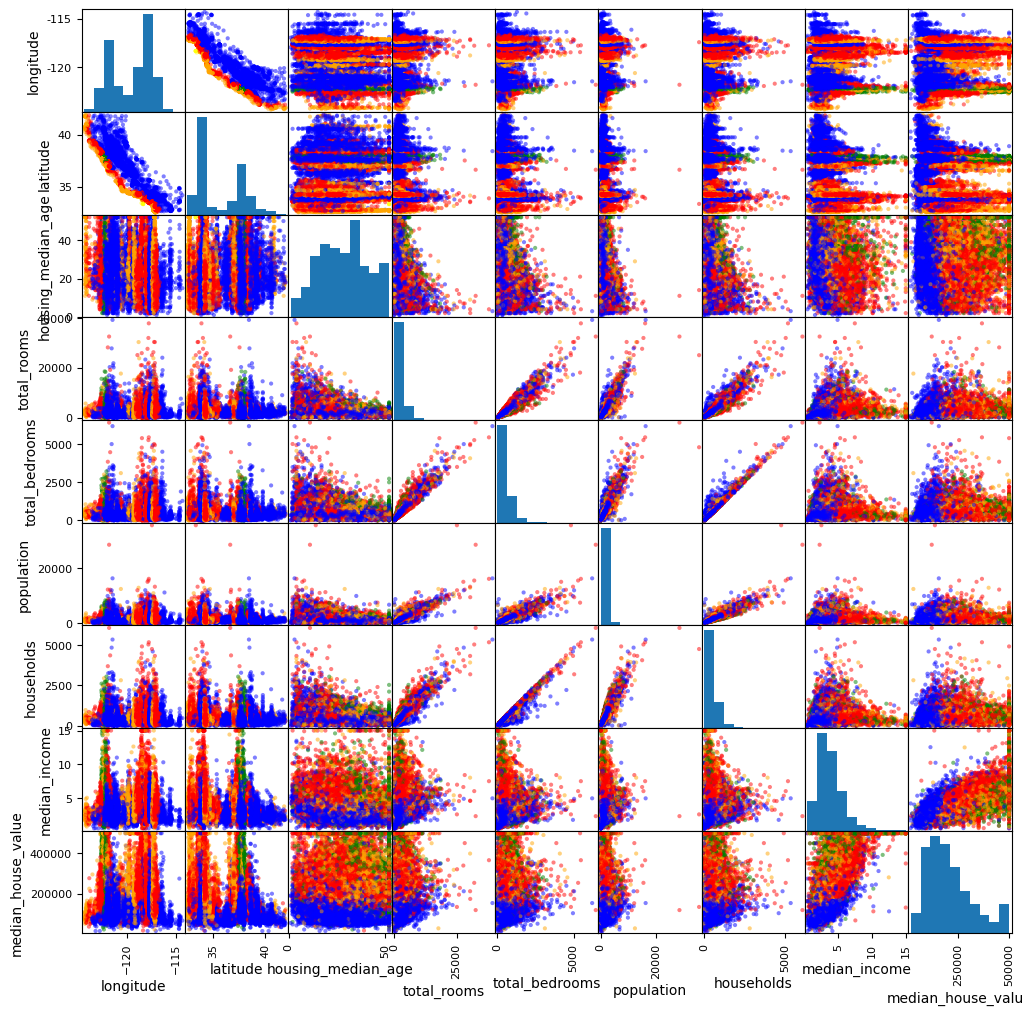

In [66]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

Después de haber examinado un extenso conjunto de gráficos, resulta sumamente difícil caracterizar las cualidades de las manzanas ubicadas en islas (aquellas que poseen el atributo 'ocean_proximity' = ISLAND), dado que constituyen una fracción muy reducida de la población total y resultan indistinguibles en grafos con un volumen de datos tan considerable.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

En este caso, la única variable categórica que tenemos es 'ocean_proximity' (proximidad al oceano) que está representada por los valores: INLAND, NEAR BAY, NEAR OCEAN, ISLAND y <1H OCEAN.

In [67]:
# Las variables categóricas requieren una selección por el tipo de variable
df.describe(include=['object']).transpose()

count unique        top  freq
ocean_proximity  20433      5  <1H OCEAN  9034

Tras observar la tabla anterior podemos analizar los siguientes datos:
* El más repetido es <1H OCEAN, es decir, prevalecen las casas a menos de una hora del océano. Además su frecuencia es de 9034.
* Hay 5 valores únicos, sin repetición. 

<Axes: >

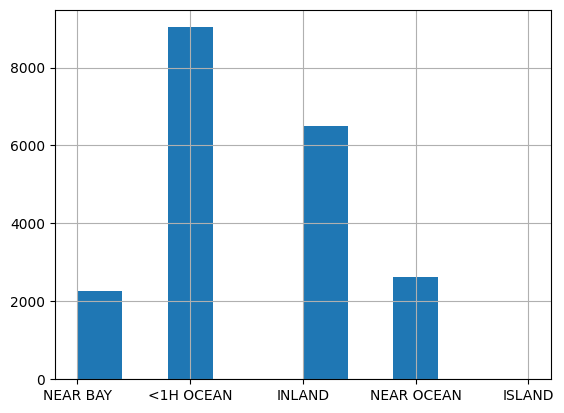

In [68]:
# Diagrama de barras mostrando cuántas veces aparece cada marca
df['ocean_proximity'].hist()







En este gráfico de frecuencias se evidencia claramente que la característica más destacada es la proximidad de las manzanas al océano, siendo menos común encontrarlas en una isla, con un número aproximado de casas cercanas a cero en esta categoría. Por otro lado, no se observa una diferencia significativa entre la proximidad a la bahía y al océano.

Como extra, añadimos el gráfico de tarta de las frecuencias.

<Axes: ylabel='count'>

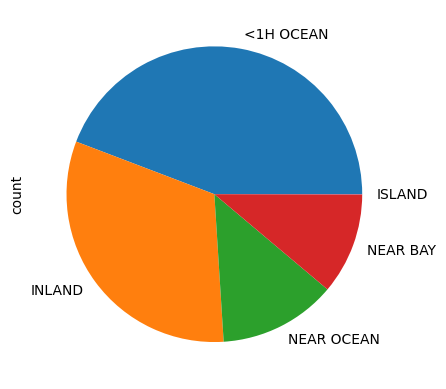

In [69]:
# Cuántas veces aparece cada marca como tarta
df['ocean_proximity'].value_counts().plot.pie()

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

En primer lugar vamos a ver si debemos cambiar las escalas de datos.
Antes de todo, cabe destacar que al observar los datos de dataframe, hay algunos valores que están cuantificados en diferentes medidas. Un ejemplo claro es el de median_income, que está medido en decenas de miles de dólares estadounidenses, mientras que median_house_value está medido en dólares estadounidenses. Esto significa que a la hora de representar estas dos variables en un diagrama de dispersión, estaríamos dando 10 mil veces más valor a los datos que guarda la variable median_house_value con respecto a los valores de median_income.
Vamos a probar a estandarizar las variables mediante el algortimo StandarScaler, que consta de dos fases, la fase de ajuste y la de transformación.
En la primera de ellas se calcula la media y la desviación típica de los datos originales. En la segunda se encarga de transformar los datos según el escalado correspondiente que hemos hallado en la fase anterior.

In [70]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_estandarizado = df.iloc[0:,].copy()

# Fase de ajuste
standard_scaler.fit(df_estandarizado[['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])

# Fase de transformación
df_estandarizado[['longitude (std)', 'latitude (std)','housing_median_age (std)', 'total_rooms (std)', 'total_bedrooms (std)', 'population (std)', 'households (std)', 'median_income (std)', 'median_house_value (std)']] = standard_scaler.transform(df_estandarizado[['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])

df_estandarizado = df_estandarizado.drop(['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'], axis=1)


df_estandarizado.head()

ocean_proximity  longitude (std)  latitude (std)  housing_median_age (std)  \
0        NEAR BAY        -1.327314        1.051717                  0.982163   
1        NEAR BAY        -1.322323        1.042355                 -0.606210   
2        NEAR BAY        -1.332305        1.037674                  1.855769   
3        NEAR BAY        -1.337296        1.037674                  1.855769   
4        NEAR BAY        -1.337296        1.037674                  1.855769   

   total_rooms (std)  total_bedrooms (std)  population (std)  \
0          -0.803813             -0.970325         -0.973320   
1           2.042130              1.348276          0.861339   
2          -0.535189             -0.825561         -0.819769   
3          -0.623510             -0.718768         -0.765056   
4          -0.461970             -0.611974         -0.758879   

   households (std)  median_income (std)  median_house_value (std)  
0         -0.976833             2.345163                  2.128819  
1          1.670373             2.332632                  1.313626  
2         -0.843427             1.782939                  1.258183  
3         -0.733562             0.932970                  1.164622  
4         -0.628930            -0.013143                  1.172418

Una vez completado el algoritmo StandardScaler, hemos obtenido los datos estandarizados. 

A continuación, en vez de estandarizar las variables, vamos a reescalarlas y así mostrar como funcionaría el algoritmo MinMax.

In [71]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_minmax = df.iloc[0:,].copy()

df_minmax[['longitude (minmax)', 'latitude (minmax)','housing_median_age (minmax)', 'total_rooms (minmax)', 'total_bedrooms (minmax)', 'population (minmax)', 'households (minmax)', 'median_income (minmax)', 'median_house_value (minmax)']] = min_max_scaler.fit_transform(df_minmax[['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])

df_minmax = df_minmax.drop(['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'], axis=1)

df_minmax.head()

ocean_proximity  longitude (minmax)  latitude (minmax)  \
0        NEAR BAY            0.211155           0.567481   
1        NEAR BAY            0.212151           0.565356   
2        NEAR BAY            0.210159           0.564293   
3        NEAR BAY            0.209163           0.564293   
4        NEAR BAY            0.209163           0.564293   

   housing_median_age (minmax)  total_rooms (minmax)  total_bedrooms (minmax)  \
0                     0.784314              0.022331                 0.019863   
1                     0.392157              0.180503                 0.171477   
2                     1.000000              0.037260                 0.029330   
3                     1.000000              0.032352                 0.036313   
4                     1.000000              0.041330                 0.043296   

   population (minmax)  households (minmax)  median_income (minmax)  \
0             0.008941             0.020556                0.539668   
1             0.067210             0.186976                0.538027   
2             0.013818             0.028943                0.466028   
3             0.015555             0.035849                0.354699   
4             0.015752             0.042427                0.230776   

   median_house_value (minmax)  
0                     0.902266  
1                     0.708247  
2                     0.695051  
3                     0.672783  
4                     0.674638

Una vez aplicados los algoritmos MinMax y StandarScaler, debemos decidir cuál de los dos escoger para seguir realizando el estudio. Observando el grafo de dispersión entre todas las variables realizado en el apartado anterior, nos damos cuenta de que las gráficas de la diagonal no siguen una distribución normal. Por tanto, no tendrá mucho sentido estandarizar las variables, así que seguiremos nuestro estudio con las variables reescaladas mediante MinMax.

Para finalizar este apartado, vamos a observar la correlación entre las variables que hemos calculado con anterioridad y así poder sacar conclusiones acerca de qué variables podremos eliminar para realizar el clustering.

In [72]:
df.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

Tal y como podemos observar en la tabla anterior, los coeficientes de correlación entre las variables total_bedrooms, total_rooms, households y population son muy elevados, es decir, estas cuatro variables toman valores muy parecidos en todo momento. Por tanto, podemos reducir estas variables a una sola con el fin de no representar información redundante. En este caso, eliminaremos las columnas de total_rooms, total_bedrooms y households y dejaremos tan solo la variable population.

A su vez, podemos darnos cuenta de que la variable housing_median_age no representa gran correlación con el resto de variables ni tampoco supone una tarea fácil intentar comprender qué información puede darnos esta variable a la hora de hacer un estudio de estos barrios. Tal y como vimos en el apartado 2, la edad media de la casa no tiene ningún tipo de relación con variables como median_house_value. Esto puede representar información que no es muy coherente con la realidad, ya que una casa antigua por lo general tendrá que tener un valor menor que una casa moderna. Además, tampoco sigue un patrón con respecto a la localización geográfica, es decir, no hay barrios donde predominen las casas más antiguas, si no que están bastante dispersas por todo el mapa. Se trata de una variable que a la hora de hacer el Clustering nos hemos dado cuenta de que nos dificulta bastante el estudio, ya que si la mantenemos nos sale que el número de clusters óptimo es 7, y estos clusters cuesta bastante diferenciarlos. Sin embargo, si optamos por quitarla, el análisis de los datos se nos hace mucho más viable ya que el nñumero de clusters se reduce a 4. Por estas razones, unidas a que no nos aporta gran información, decidimos eliminar housing_median_age.


In [73]:
df = df.drop(['housing_median_age','total_bedrooms', 'total_rooms', 'households'], axis=1)

df_minmax = df_minmax.drop(['housing_median_age (minmax)','total_bedrooms (minmax)', 'total_rooms (minmax)', 'households (minmax)'], axis=1)

df_estandarizado = df_estandarizado.drop(['housing_median_age (std)','total_bedrooms (std)', 'total_rooms (std)', 'households (std)'], axis=1)

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [74]:
# Para hacer los clusters quitamos la columna ocean_proximity porque causa problemas.
df_no_ocean = df.drop(['ocean_proximity'], axis = 1)
df_no_ocean_estandarizado = df_estandarizado.drop(['ocean_proximity'], axis = 1)
df_no_ocean_minnmax = df_minmax.drop(['ocean_proximity'], axis = 1)

A continuación, mostramos una adaptación del código de plot_clusters que nos permite mostrar los clusters pasandole dos columnas de nuestro data frame.

In [75]:
def plot_clusters(X, Y, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['lime', 'r','g','b','orange','c','y','m','pink','violet']
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X, Y, c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [76]:
def plot_clusters2(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['lime', 'r','g','b','orange','c','y','m','pink','violet']
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))

    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
    
    plt.show()

Sin embargo, en nuestro caso, presentamos un número más elevado de variables, no solo 2. Por tanto, no podremos visualizar un diagrama que presente todas las variables con los clusters coloreados. Es por eso que seleccionaremos latitud y longitud como las variables sobre las que representar los clusters. Aún así, calcularemos el algoritmo kMeans para todas las k, desde k = 2 hasta k = 10, y devolveremos finalmente el gráfico de valores de Davies Boulding. Además, hemos añadido como extra algunas agrupaciones de clusters en parejas de variables (las que mas interesantes nos parecían).

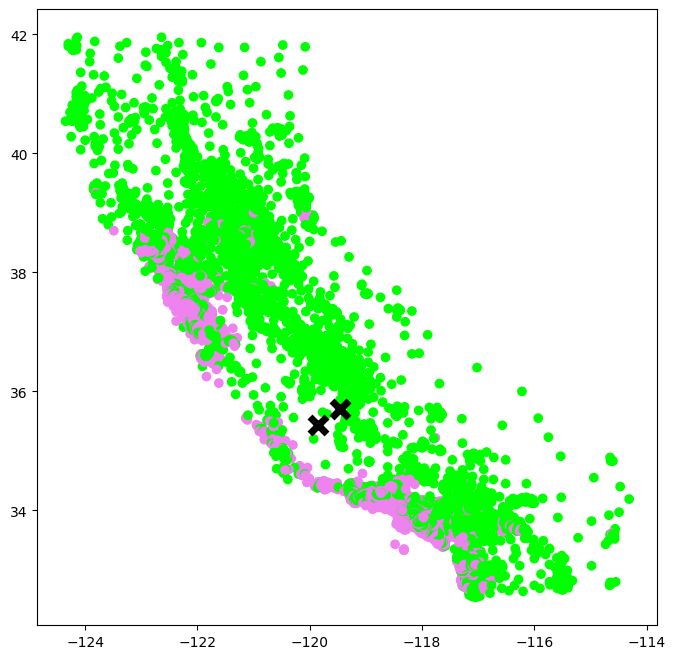

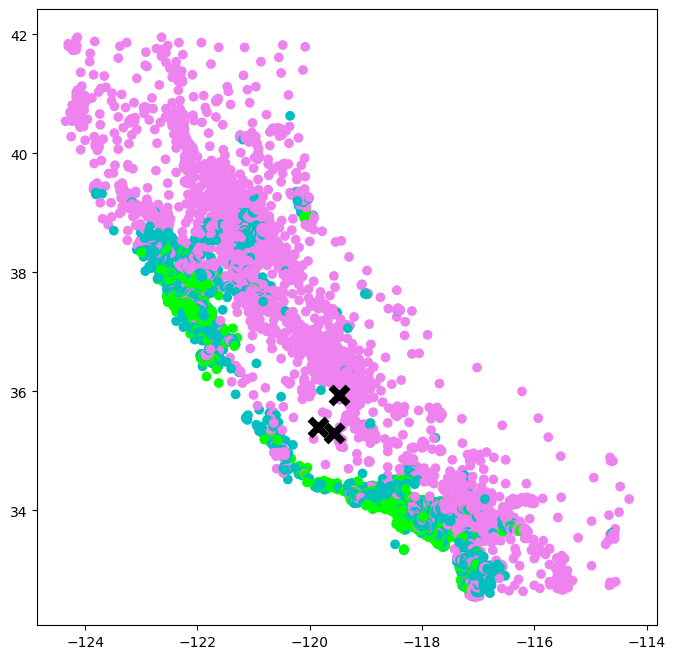

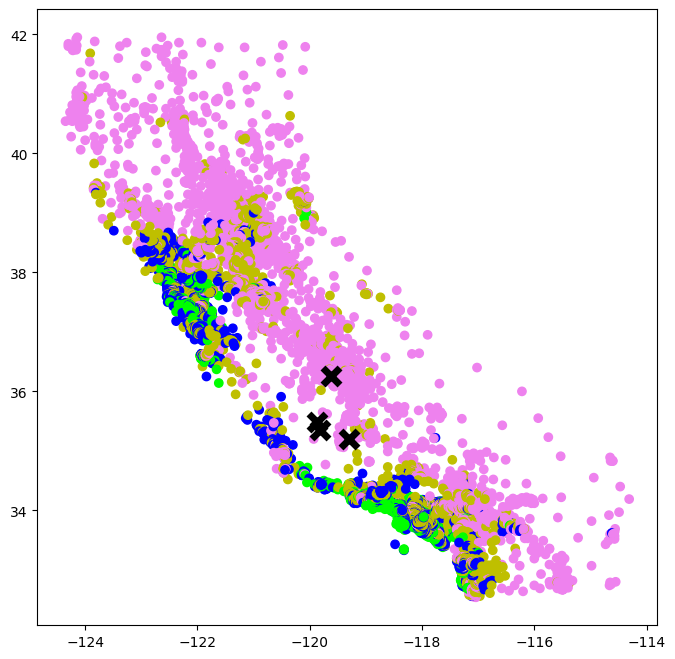

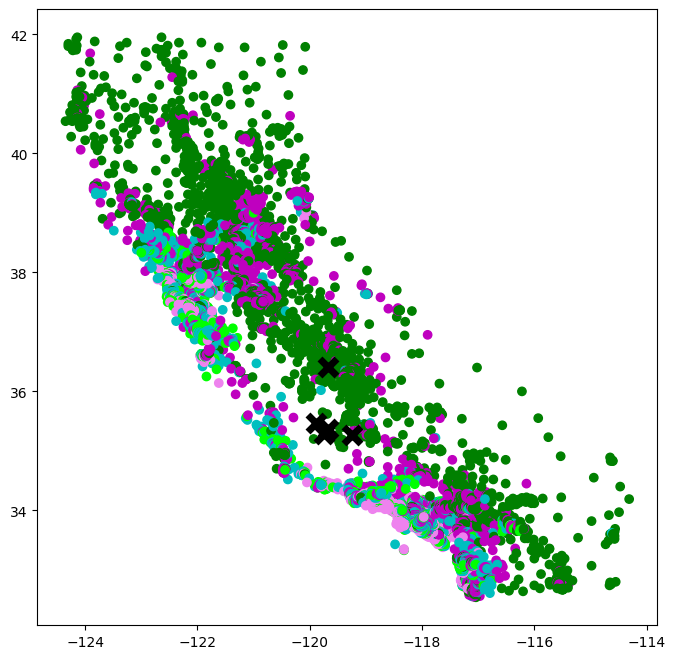

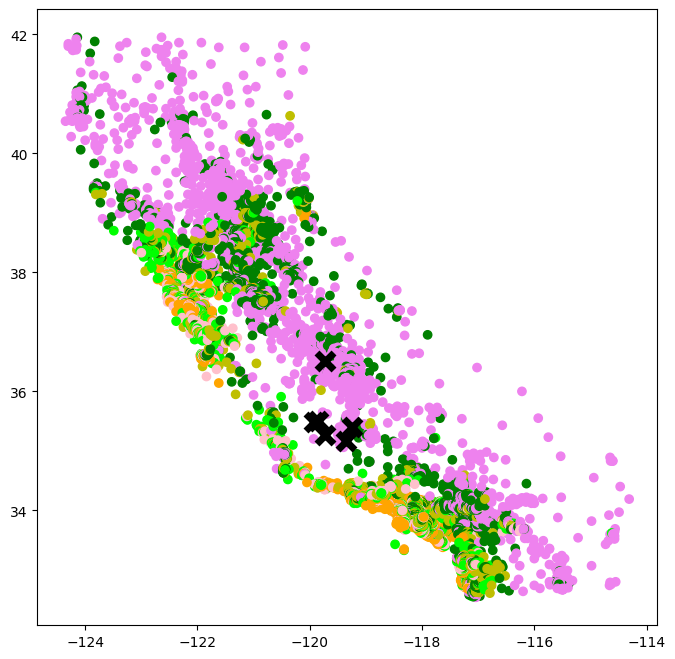

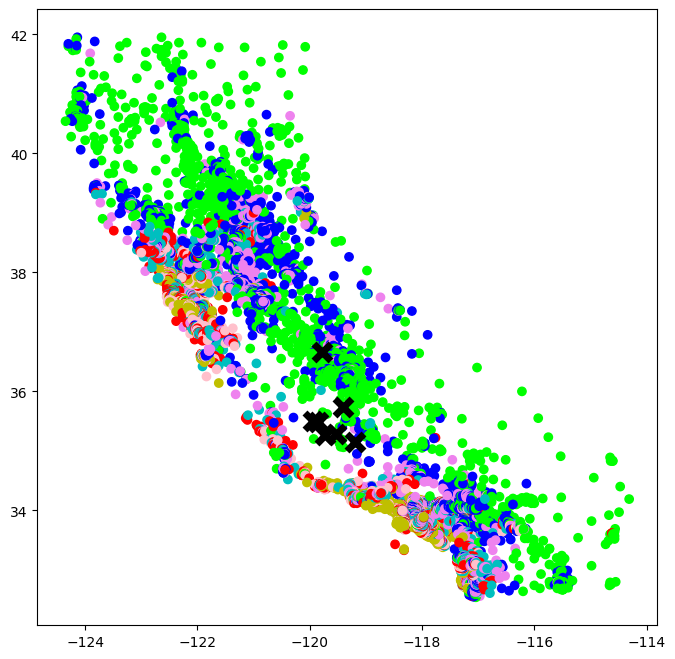

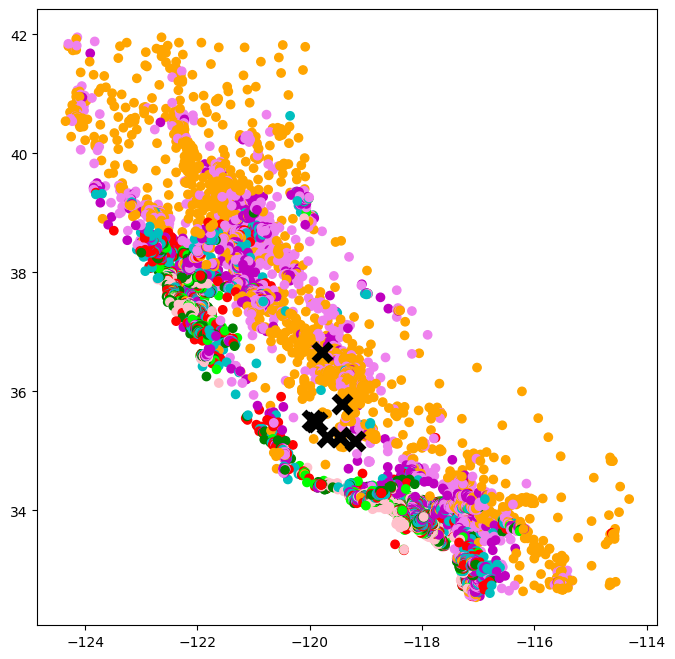

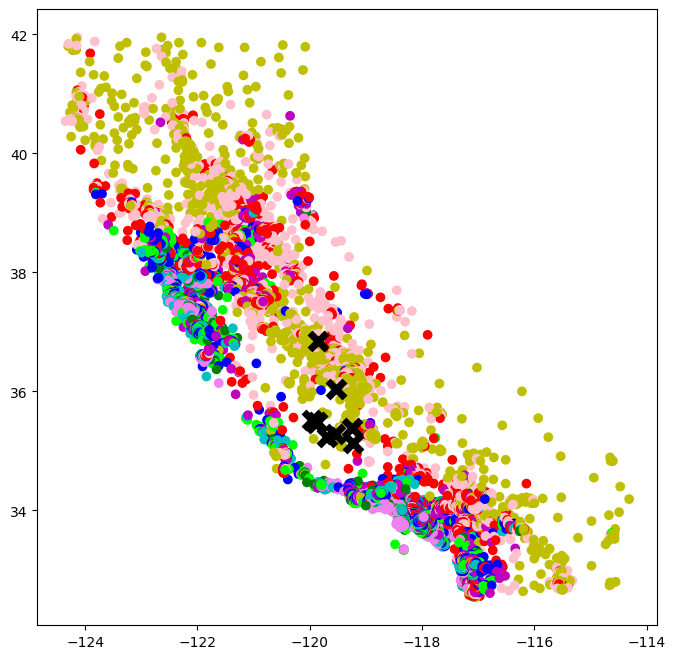

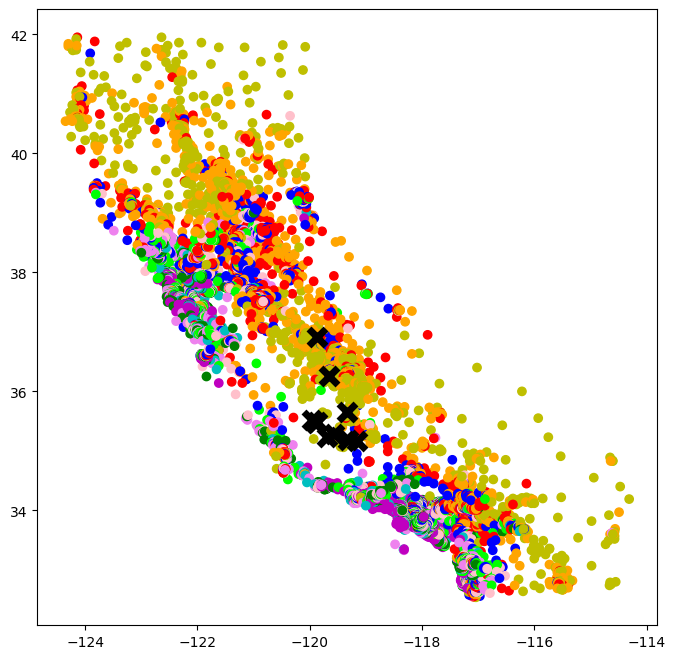

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

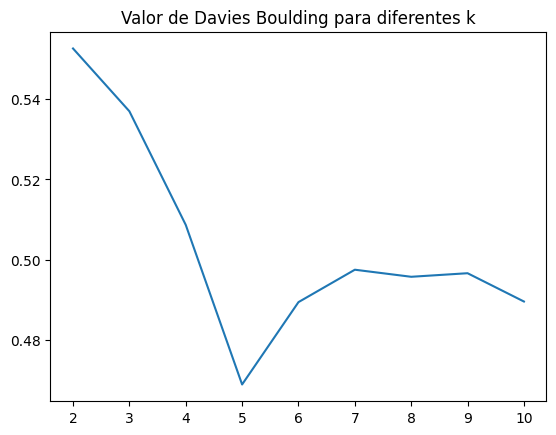

In [77]:
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(df_no_ocean)
    plot_clusters2(df_no_ocean.values, km.labels_, km.cluster_centers_)

    davies_boulding[k-2] = davies_bouldin_score(df_no_ocean, km.labels_) 
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')


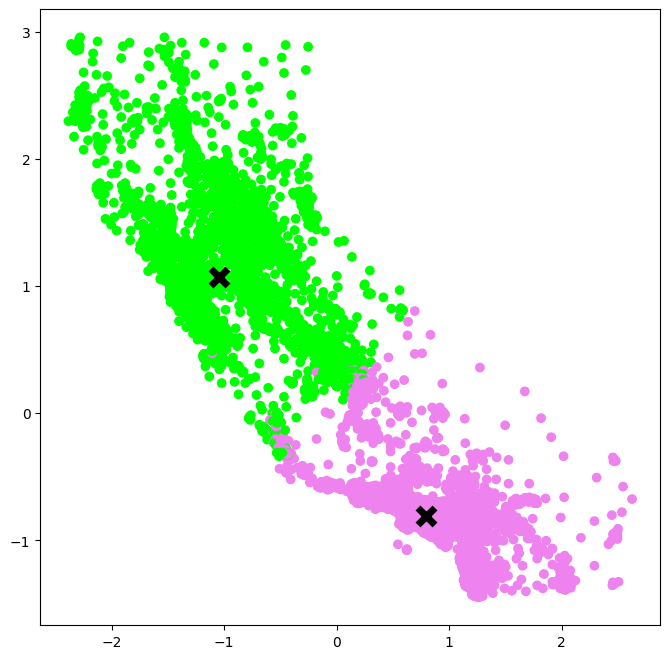

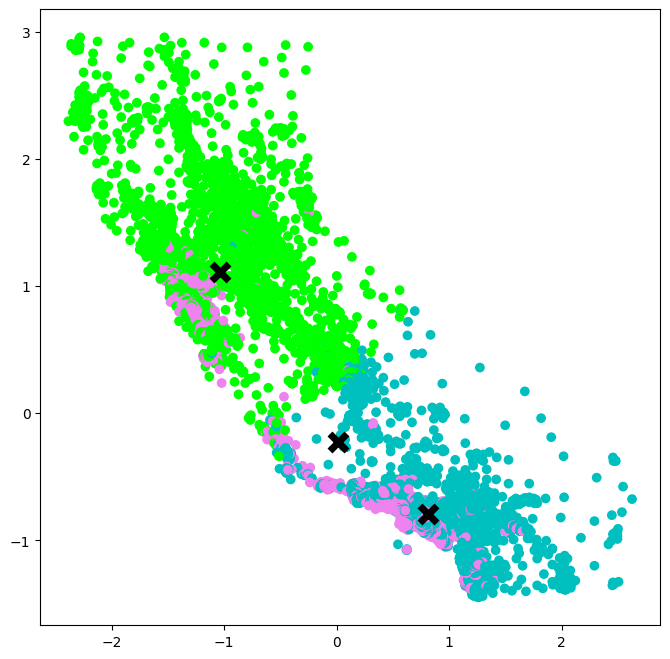

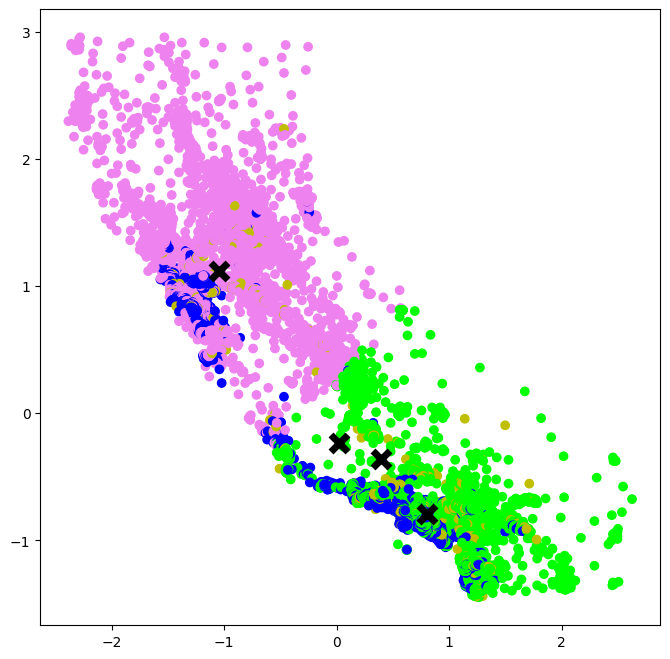

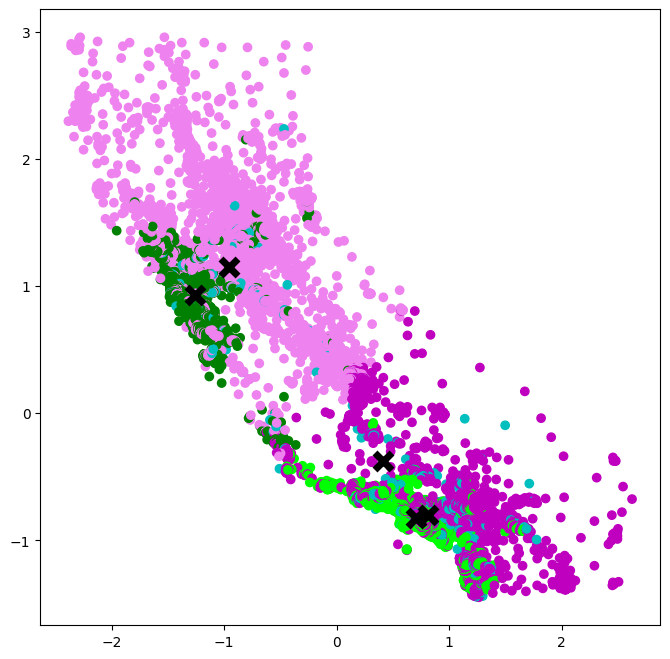

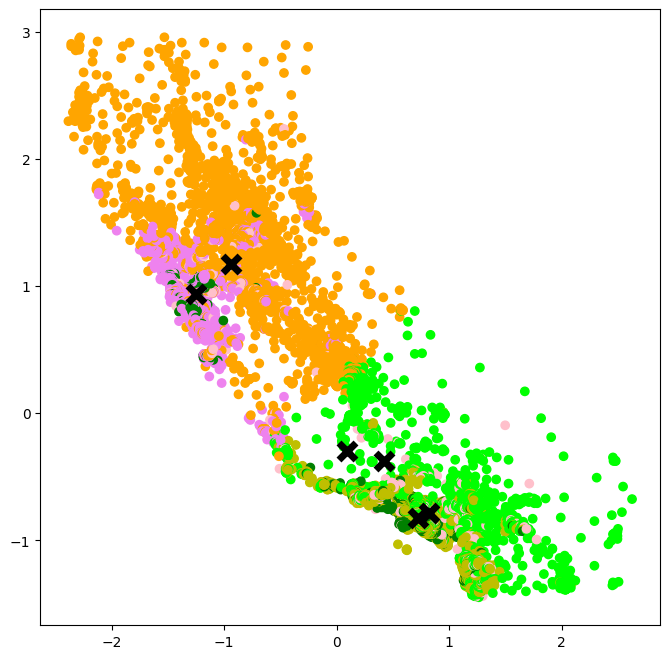

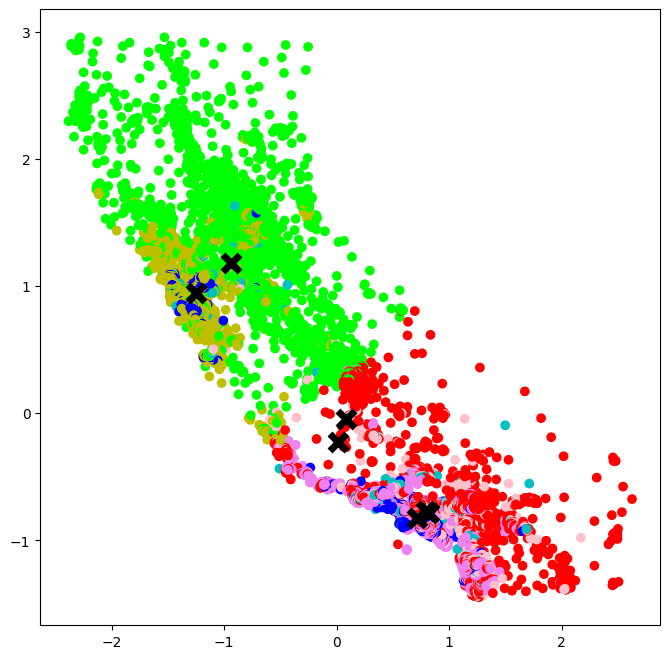

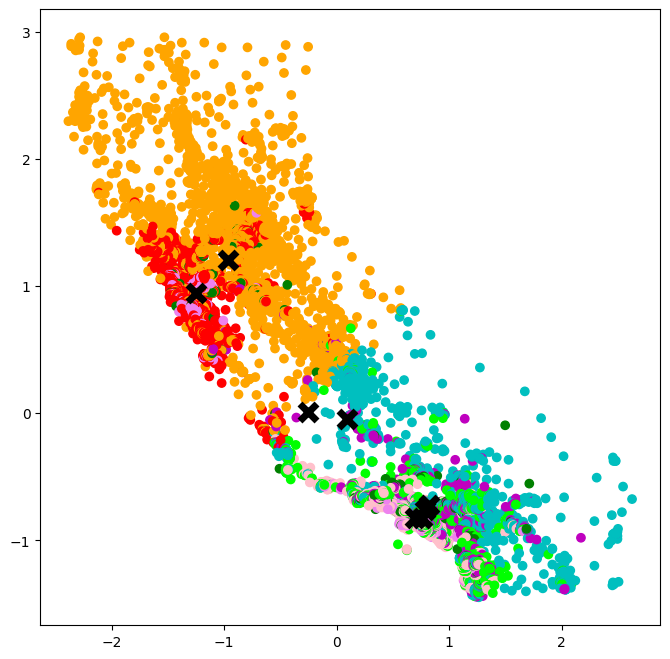

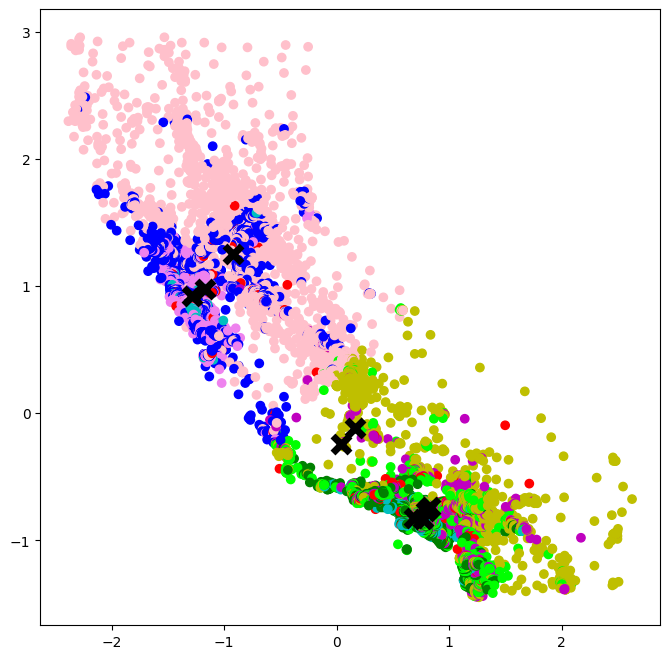

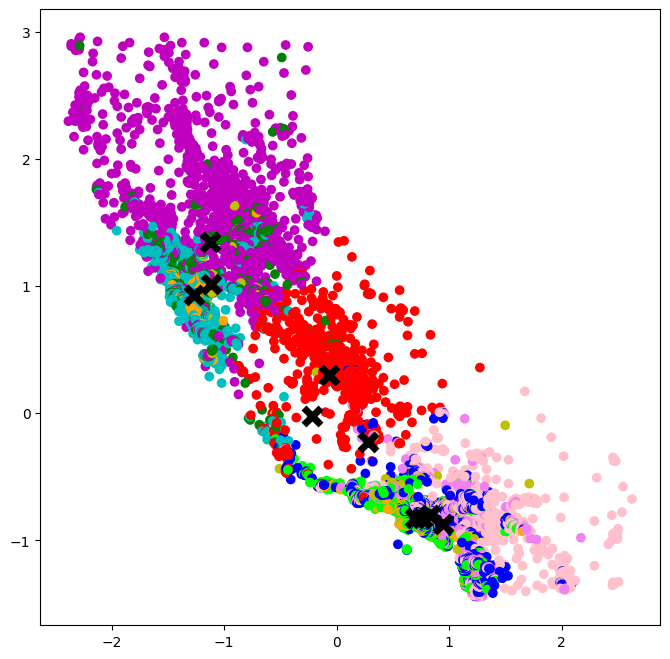

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

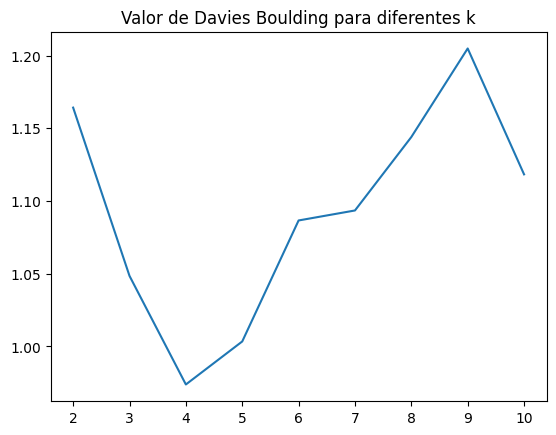

In [78]:
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(df_no_ocean_estandarizado)
    plot_clusters2(df_no_ocean_estandarizado.values, km.labels_, km.cluster_centers_)

    davies_boulding[k-2] = davies_bouldin_score(df_no_ocean_estandarizado, km.labels_) 
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

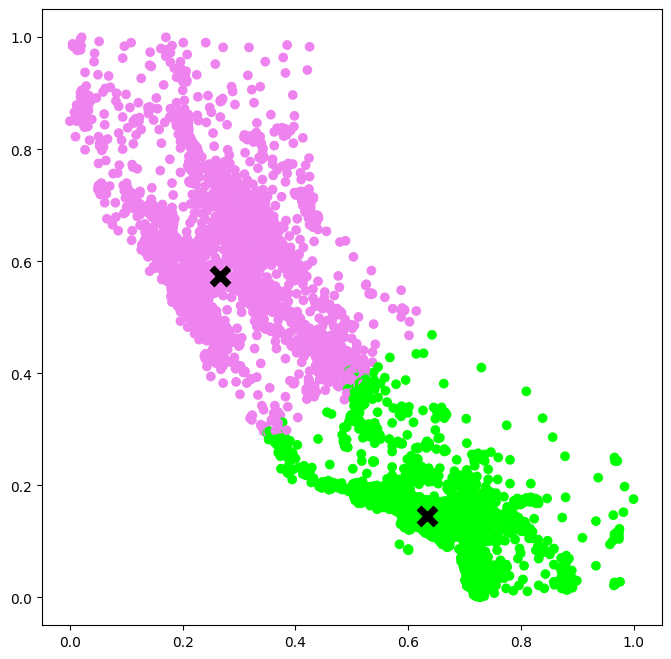

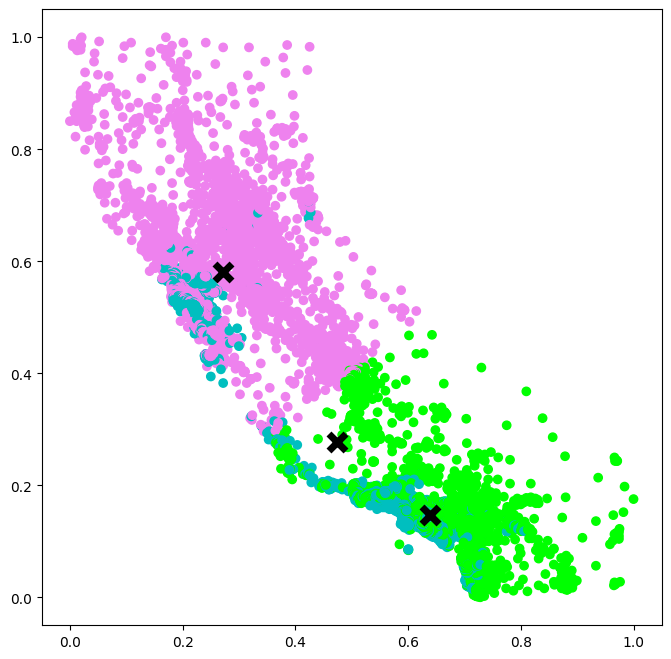

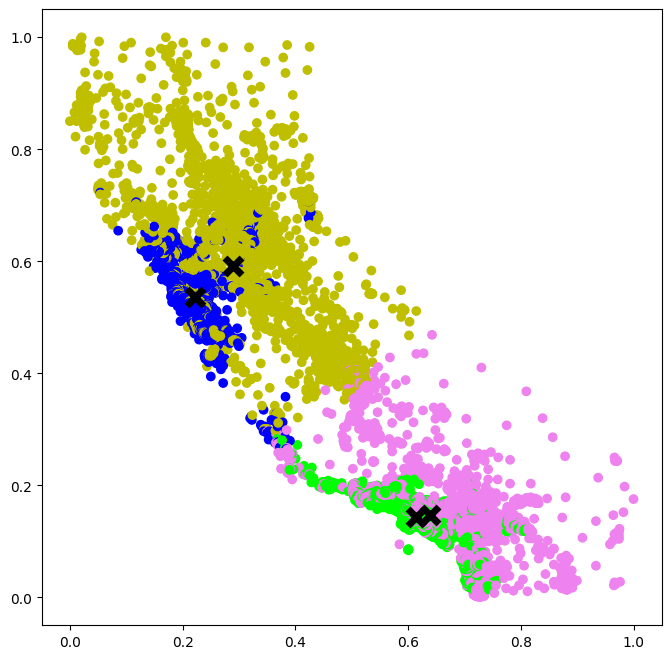

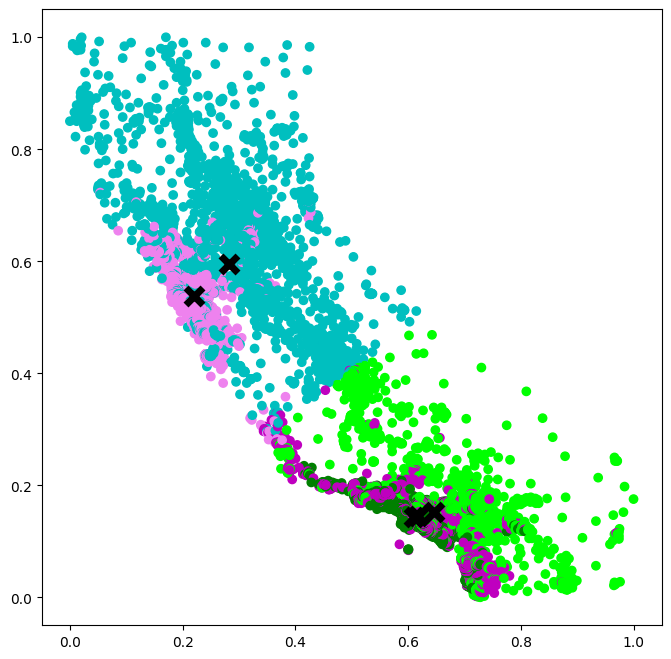

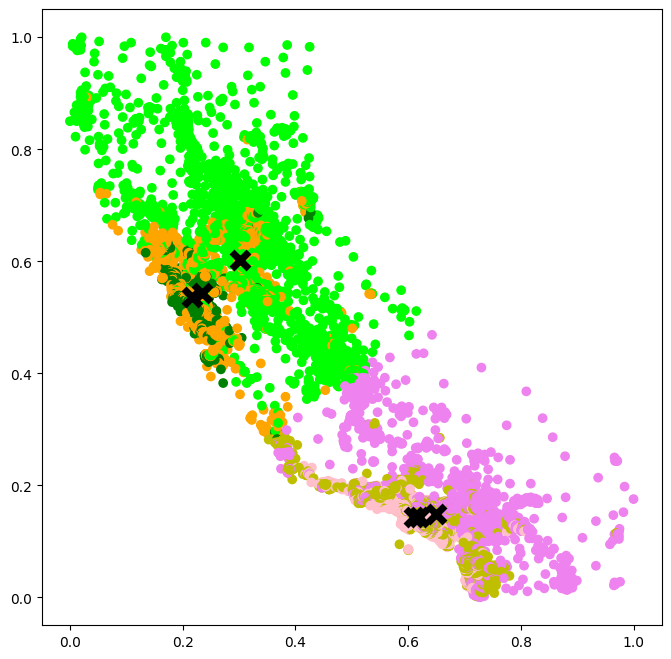

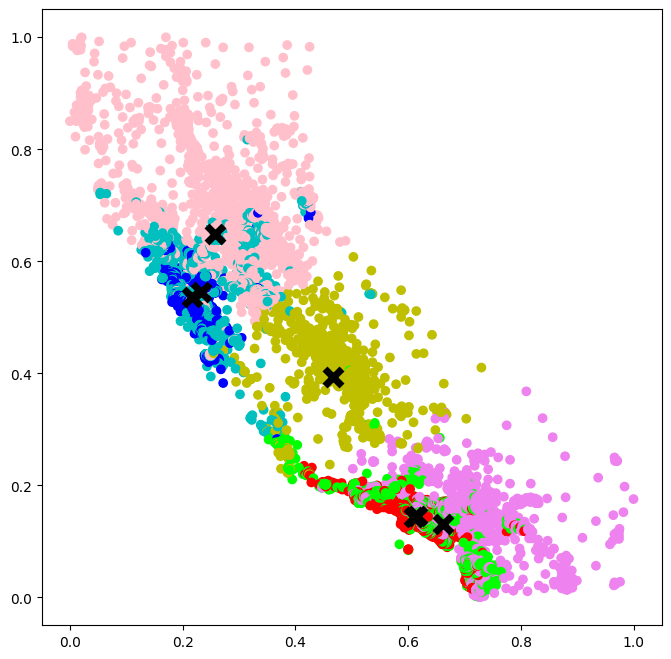

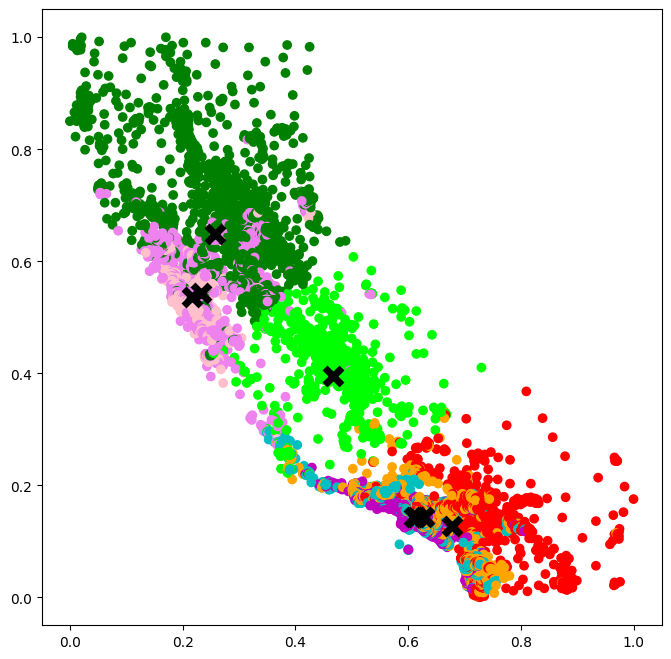

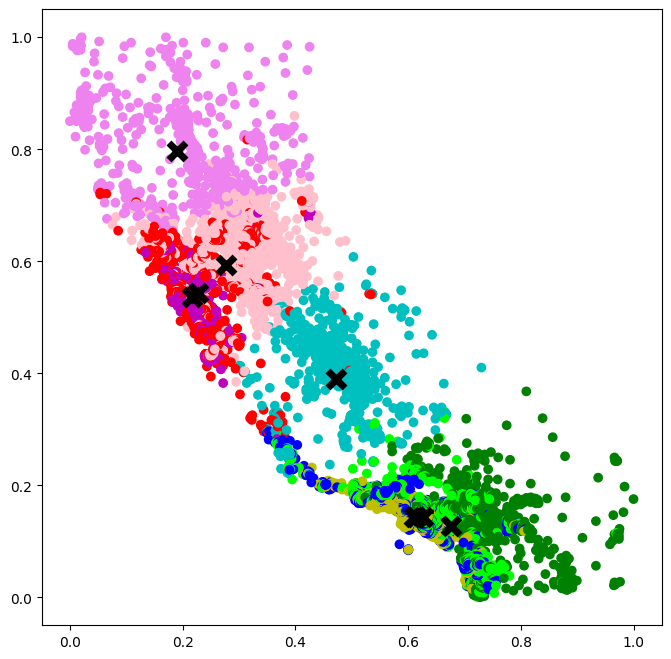

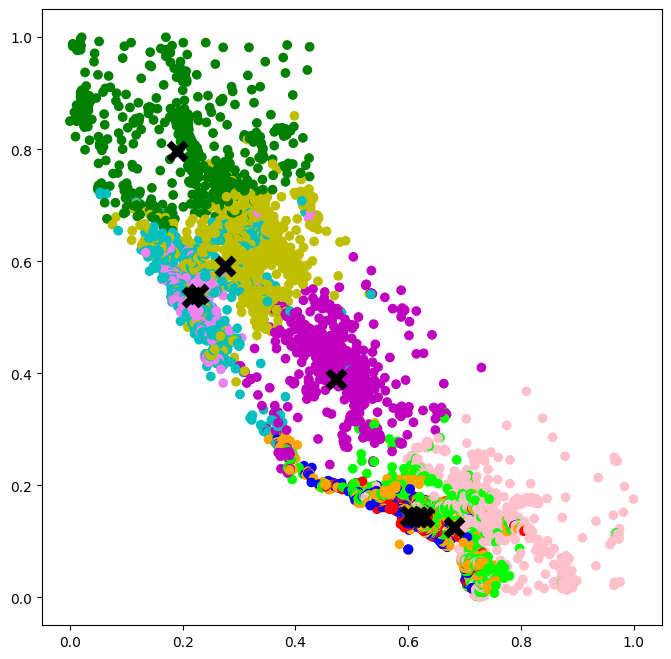

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

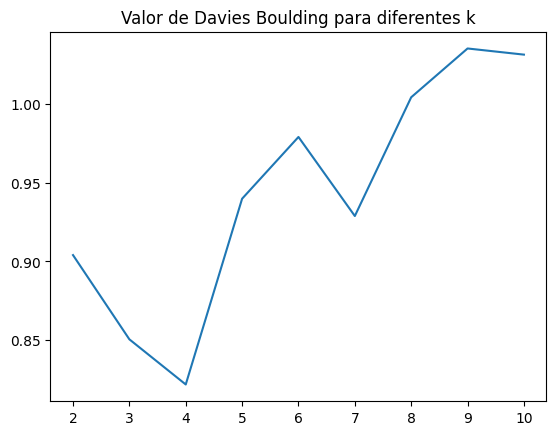

In [79]:
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(df_no_ocean_minnmax)
    plot_clusters2(df_no_ocean_minnmax.values, km.labels_, km.cluster_centers_)
    davies_boulding[k-2] = davies_bouldin_score(df_no_ocean_minnmax, km.labels_) 
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

#### Análisis de los datos agrupados por clusters para todas las variables:

En el análisis inicial de los datos sin modificar, observamos un índice de Davies Bouldin de 5. Cuando aplicamos la estandarización a los datos, este índice disminuye a 4, lo que indica una mejora en la agrupación, al igual que en el caso de las variables reescaladas mediante MinMax.

La premisa general es que la mejor configuración de clústeres es aquella que se aproxima más a las agrupaciones reales, y que implica la menor cantidad de clústeres. Por lo tanto, a primera vista, y unido con lo comentado en el apartado anterior, los datos reescalados parecen ser los que mejor agrupan las variables.

No obstante, es importante señalar que sin la visualización correspondiente, es difícil imaginar la distribución de los datos en los clústeres. Por consiguiente, procederemos a examinar las variables agrupadas de dos en dos, lo que nos permitirá desarrollar una mejor intuición sobre cómo se están agrupando los datos.

### Clusters para variables de dos en dos: 

Después de haber determinado el número óptimo de clústeres para todas las variables simultáneamente, procederemos a realizar el análisis para las variables de manera pareada (utilizando el data frame minmax). Esta aproximación nos facilitará una observación visual más detallada del comportamiento del agrupamiento. Siguiendo el mismo procedimiento previamente establecido, emplearemos el algoritmo de Davies Bouldin para evaluar las agrupaciones, variando el número de clústeres desde 2 hasta 10. Además, en vez de imprimir todos los gráficos, solo imprimiremos el que tenga menor índice de David Boulding.

In [88]:
# Imprimir el de menor indice kBoulding
def realizar_clustering_kmeans(k, var1, var2):
    # Inicializamos el modelo KMeans
    km = KMeans(init='random', n_clusters=k, random_state=333)
    
    # Seleccionamos las características relevantes del dataframe (longitude y latitude estandarizadas)
    df_median = df_no_ocean_minnmax.loc[0:, [var1, var2]]
    
    # Ajustamos el modelo KMeans a los datos
    km.fit(df_median)
    
    # Visualizamos los resultados del clustering
    plot_clusters(df_median[var1], df_median[var2], km.labels_, km.cluster_centers_)


#### Longitud y latitud.

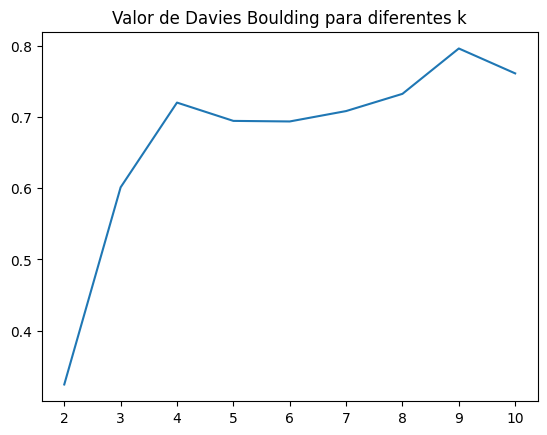

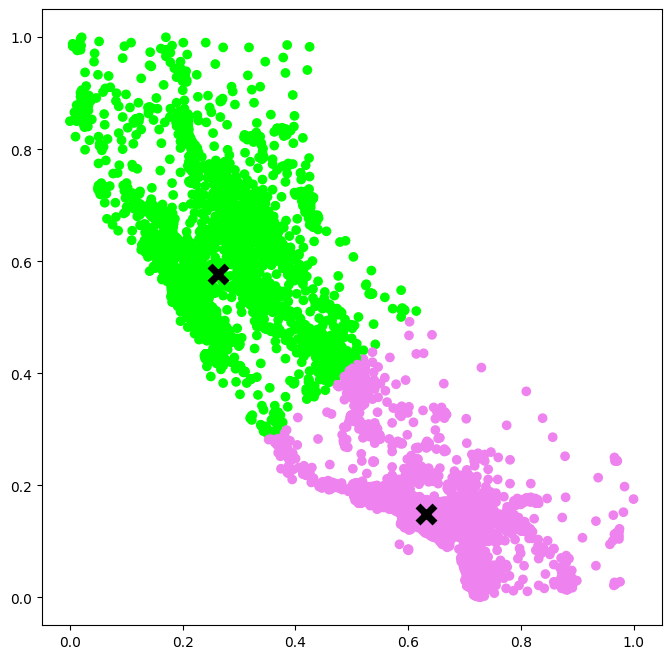

In [103]:
#Calculemos cuántos clusters son buenos entre 2 y 10 para las variables longitud y latitud.
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    df_median = df_no_ocean_minnmax.loc[0:, ['longitude (minmax)', 'latitude (minmax)']]
    km.fit(df_median)
    davies_boulding[k-2] = davies_bouldin_score(df_median, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

# Imprimimos solo el grafico del que ha obtenido menor numer de clusters
realizar_clustering_kmeans(np.argmin(davies_boulding)+2, 'longitude (minmax)', 'latitude (minmax)')


Tras calcular el valor de Davies Boulding vemos que el mejor número de clusters es 2.

#### Longitude y population.

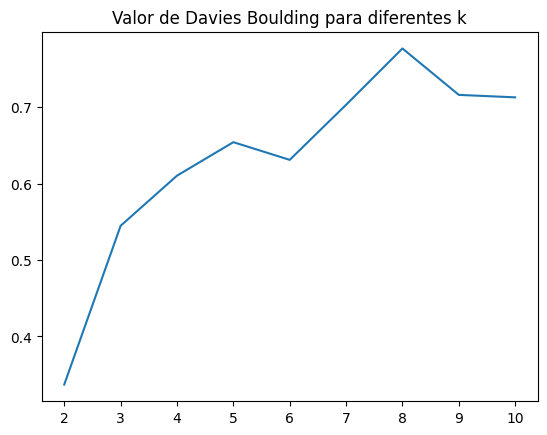

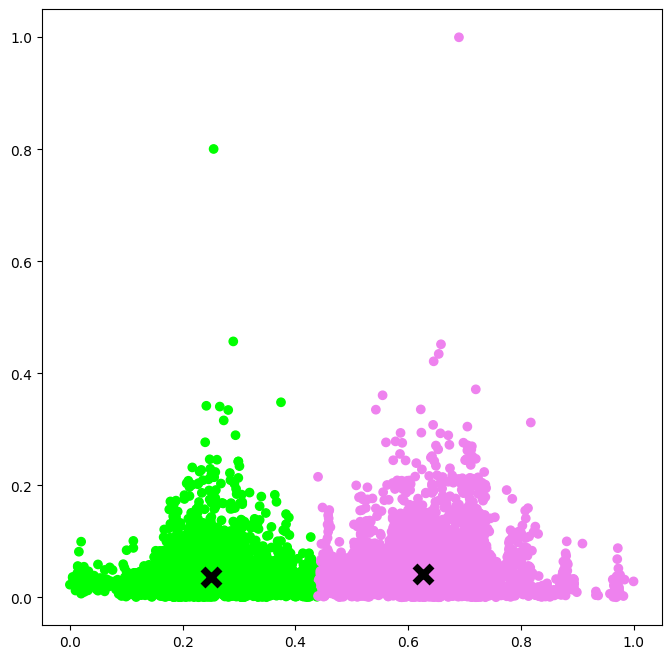

In [91]:
#Calculemos cuántos clusters son buenos entre 2 y 10 para longitud y population
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    df_median = df_no_ocean_minnmax.loc[0:, ['longitude (minmax)', 'population (minmax)']]
    km.fit(df_median)
    davies_boulding[k-2] = davies_bouldin_score(df_median, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

realizar_clustering_kmeans(np.argmin(davies_boulding)+2, 'longitude (minmax)', 'population (minmax)')

Por tanto, el mejor número de clusters para las variables longitude y population es 2.

#### Longitude y median income.

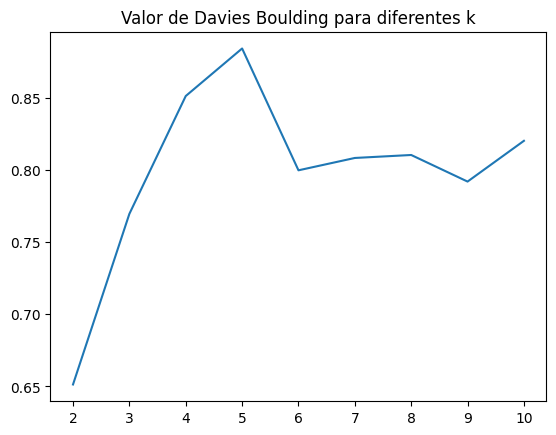

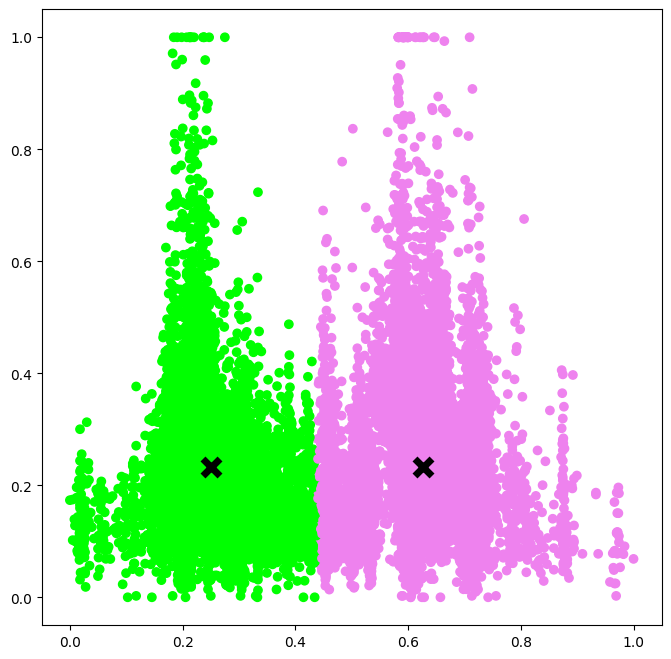

In [102]:
#Calculemos cuántos clusters son buenos entre 2 y 10 para longitude y median_income
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    df_median = df_no_ocean_minnmax.loc[0:, ['longitude (minmax)', 'median_income (minmax)']]
    km.fit(df_median)
    davies_boulding[k-2] = davies_bouldin_score(df_median, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

realizar_clustering_kmeans(np.argmin(davies_boulding)+2, 'longitude (minmax)', 'median_income (minmax)')

#### Population y median house value.

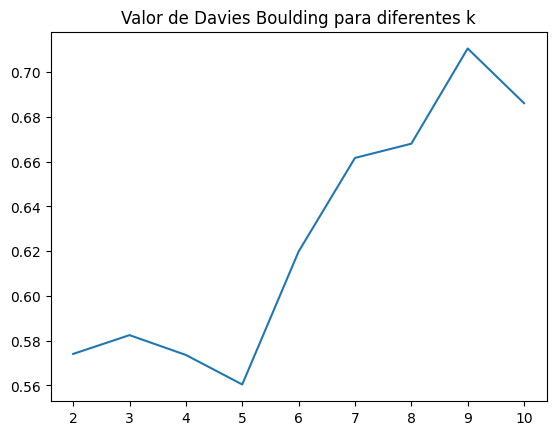

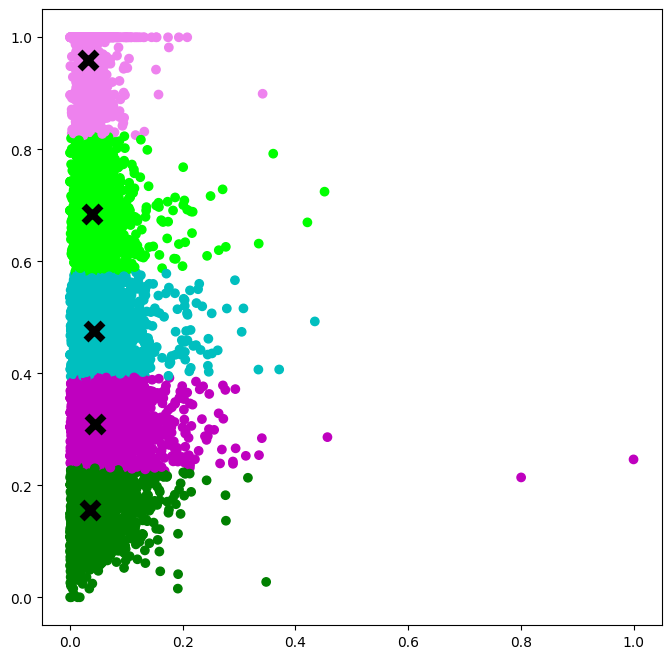

In [92]:
#Calculemos cuántos clusters son buenos entre 2 y 10 para population y median_house_value
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    df_median = df_no_ocean_minnmax.loc[0:, ['population (minmax)', 'median_house_value (minmax)']]
    km.fit(df_median)
    davies_boulding[k-2] = davies_bouldin_score(df_median, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

realizar_clustering_kmeans(np.argmin(davies_boulding)+2, 'population (minmax)', 'median_house_value (minmax)')

Número óptimo de clusters para las variables households y median house value es 5.

#### Median income y median house value.

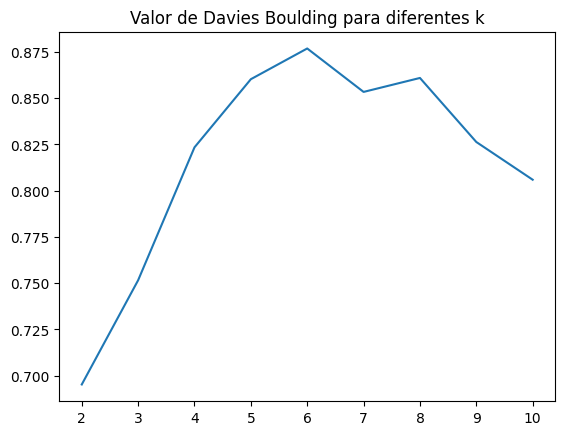

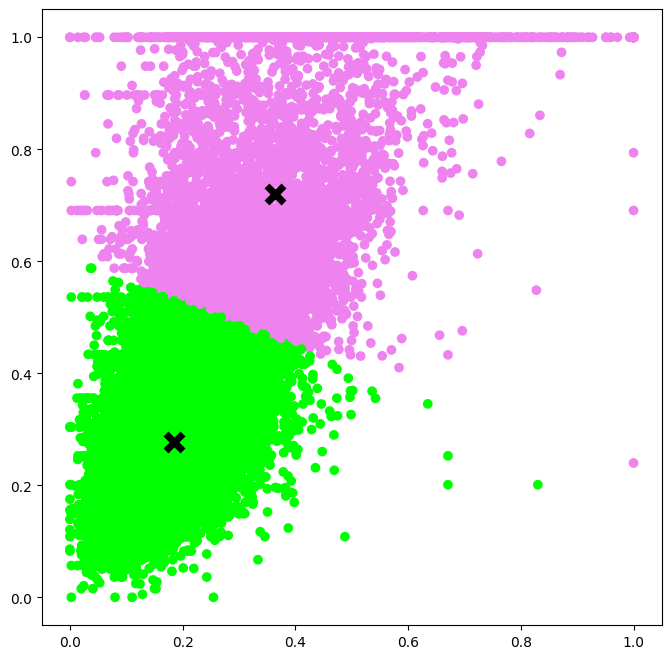

In [94]:
#Calculemos cuántos clusters son buenos entre 2 y 10 para median_income y median_house_value
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    df_median = df_no_ocean_minnmax.loc[0:, ['median_income (minmax)', 'median_house_value (minmax)']]
    km.fit(df_median)
    davies_boulding[k-2] = davies_bouldin_score(df_median, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

realizar_clustering_kmeans(np.argmin(davies_boulding)+2, 'median_income (minmax)', 'median_house_value (minmax)')

#### Median income y latitude.

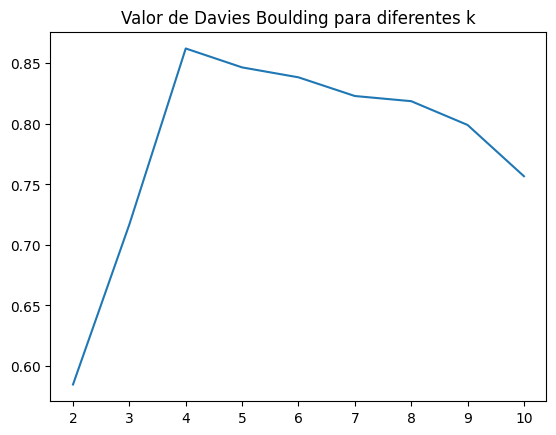

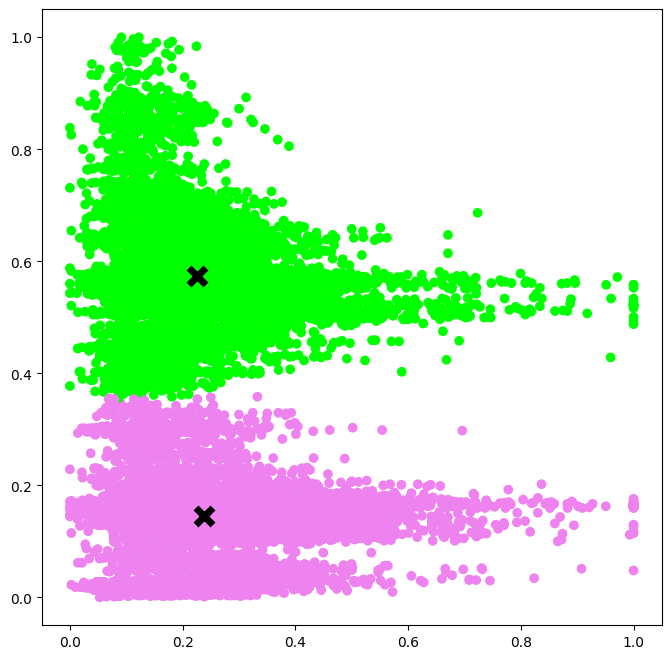

In [99]:
#Calculemos cuántos clusters son buenos entre 2 y 10 para median_income y latitude
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    df_median = df_no_ocean_minnmax.loc[0:, ['median_income (minmax)', 'latitude (minmax)']]
    km.fit(df_median)
    davies_boulding[k-2] = davies_bouldin_score(df_median, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

realizar_clustering_kmeans(np.argmin(davies_boulding)+2, 'median_income (minmax)', 'latitude (minmax)')

Observamos que al analizar las agrupaciones óptimas de los clústeres, en la mayoría de los casos de comparación de variables de dos en dos, se identifica que la mejor configuración consiste en dos clústeres. No obstante, al considerar la totalidad de las variables en conjunto, emerge una recomendación que sugiere la utilización de cuatro clústeres para una agrupación más adecuada. Este fenómeno sugiere una complejidad adicional en la interacción entre las variables cuando se las considera en conjunto, lo cual podría derivar en una estructura de agrupación más fina y diferenciada.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

En primer lugar, aplicando el algoritmo KMeans para los datos reescalados por MinMax, vamos a mostrar los centroides de cada cluster, es decir, los valores que tomaría un individuo prototípico de cada cluster.

In [35]:
km = KMeans(init='random', n_clusters=4, random_state=333)
df_median = df_no_ocean_minnmax.loc[0:, ['longitude (minmax)', 'latitude (minmax)', 'population (minmax)', 'median_income (minmax)', 'median_house_value (minmax)']]
km.fit(df_median)


centers = km.cluster_centers_
centers

array([[0.61331873, 0.14271649, 0.03824502, 0.37616953, 0.75525523],
       [0.2213674 , 0.53674629, 0.03767219, 0.33819013, 0.65972714],
       [0.28882006, 0.59069743, 0.03530826, 0.17180756, 0.22895895],
       [0.63930827, 0.14646021, 0.04409855, 0.19255683, 0.30553759]])

Una vez definidos los centroides, vamos a agrupar los datos originales mediantes los clusters obtenidos aplicando el algoritmo KMeans a los datos reescalados. De esta manera, podremos interpretarlos con una mayor facilidad. A su vez, añadiremos de nuevo el diagrama de dispersión que genera el algortimo KMeans sobre los datos reescalados por MinMax y un número de clusters óptimo, que en este caso es 4, para facilitarnos el estudio y comprensión de los datos. A su vez, sacamos los datos estadísticos resultantes de la agrupación por clusters y los interpretamos.

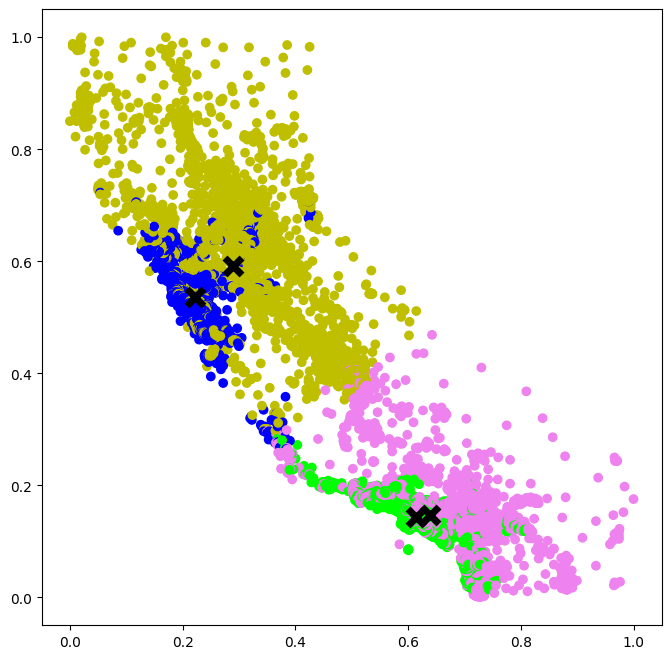

In [36]:
km = KMeans(init='random', n_clusters=4, random_state=333)
km.fit(df_no_ocean_minnmax)
plot_clusters2(df_no_ocean_minnmax.values, km.labels_, km.cluster_centers_)

In [37]:
df_copia = df_no_ocean_minnmax.iloc[0:,].copy()

ej5 = pd.DataFrame(data=df_copia, columns=['longitude (minmax)', 'latitude (minmax)', 'population (minmax)', 'median_income (minmax)', 'median_house_value (minmax)'])
ej5 = ej5.assign(cluster=pd.Series(data=km.labels_))

df_copia2 = df_no_ocean.iloc[0:,].copy()
df_copia2['cluster'] = ej5['cluster']

df_copia2.groupby(["cluster"]).describe().transpose()

cluster                               0              1              2  \
longitude          count    2828.000000    2870.000000    5887.000000   
                   mean     -118.192122    -122.127672    -121.450620   
                   std         0.586059       0.384386       1.050602   
                   min      -120.670000    -123.810000    -124.350000   
                   25%      -118.430000    -122.420000    -122.180000   
                   50%      -118.300000    -122.140000    -121.510000   
                   75%      -117.870000    -121.950000    -120.940000   
                   max      -116.250000    -119.320000    -118.180000   
latitude           count    2828.000000    2870.000000    5887.000000   
                   mean       33.882857      37.591028      38.097440   
                   std         0.400626       0.478078       1.111104   
                   min        32.630000      35.030000      35.130000   
                   25%        33.737500      37.350000      37.440000   
                   50%        33.995000      37.655000      37.960000   
                   75%        34.140000      37.810000      38.640000   
                   max        35.350000      39.340000      41.950000   
population         count    2828.000000    2870.000000    5887.000000   
                   mean     1367.396747    1347.294774    1262.745881   
                   std      1163.938150     994.407694    1039.647693   
                   min         3.000000       8.000000       9.000000   
                   25%       753.000000     752.000000     702.000000   
                   50%      1087.500000    1121.000000    1048.000000   
                   75%      1606.000000    1650.000000    1544.000000   
                   max     16122.000000   12203.000000   28566.000000   
median_income      count    2828.000000    2870.000000    5887.000000   
                   mean        5.954713       5.406063       2.992135   
                   std         2.349583       2.055235       1.082493   
                   min         0.499900       0.854300       0.499900   
                   25%         4.321400       4.041700       2.200000   
                   50%         5.749000       5.078050       2.883300   
                   75%         6.984000       6.285600       3.680950   
                   max        15.000100      15.000100      10.226400   
median_house_value count    2828.000000    2870.000000    5887.000000   
                   mean   381340.987977  335154.649477  126141.786649   
                   std     82829.938467   87855.924689   50163.241109   
                   min    224100.000000  131300.000000   14999.000000   
                   25%    311100.000000  263300.000000   85000.000000   
                   50%    360150.000000  312500.000000  119000.000000   
                   75%    474300.000000  393200.000000  163950.000000   
                   max    500001.000000  500001.000000  258300.000000   

cluster                               3  
longitude          count    8848.000000  
                   mean     -117.931096  
                   std         0.781179  
                   min      -120.850000  
                   25%      -118.290000  
                   50%      -118.060000  
                   75%      -117.350000  
                   max      -114.310000  
latitude           count    8848.000000  
                   mean       33.918062  
                   std         0.622954  
                   min        32.540000  
                   25%        33.780000  
                   50%        33.970000  
                   75%        34.130000  
                   max        36.950000  
population         count    8848.000000  
                   mean     1576.449141  
                   std      1203.986991  
                   min         5.000000  
                   25%       886.000000  
                   50%      1295.000000  
                   75%      1897.250000 

Realizaremos un análisis estadístico de los datos recabados. Inicialmente, es relevante señalar que el gráfico de dispersión previamente presentado concuerda con la cartografía de California.

Al contrastar el mapa geográfico real del estado con el diagrama de dispersión obtenido, es posible asociar cada uno de los conglomerados geográficamente con una región específica de California. Notamos que el Cluster0 (color verde) se identifica con la urbe de Los Ángeles. A su vez, el Cluster3 (color rosa) puede ubicarse como una zona periférica de Los Ángeles. Esta asociación se debe a que son los dos clusters con menor latitud, es decir, ubicados más al sur del mapa. Siguiendo el mismo principio, el Cluster1 (color azul) puede identificarse con la ciudad de San Francisco, al ser la región situada más al oeste del mapa, es decir, con un valor de longitud más elevado. Por último, el Cluster2 (color marrón) se relaciona con la ciudad de Sacramento, al ser la zona con la latitud más alta, es decir, más al norte.

Una vez identificados los clusters con sus respectivas regiones geográficas de California, proseguiremos el análisis de los demás datos.

Respecto a la densidad poblacional por manzana, se observa que curiosamente el Cluster3, correspondiente a las afueras de Los Ángeles, exhibe la media más alta de habitantes por manzana, seguido por los Cluster0 y Cluster1, que corresponden a las ciudades de Los Ángeles y San Francisco, respectivamente. Se concluye que la zona de Sacramento (Cluster2) es la que presenta la menor media de habitantes por manzana. Estos hallazgos pueden resultar sorprendentes, dado que se podría esperar una mayor densidad poblacional en ciudades grandes como San Francisco y Los Ángeles. Sin embargo, este fenómeno se explica debido a que la mayoría de los tres millones de habitantes de Los Ángeles residen en las áreas periféricas, donde los alquileres son más asequibles, como se explicará posteriormente. Las ciudades estadounidenses suelen caracterizarse por tener un núcleo urbano muy comercial e industrial, que no se encuentra habitado por una gran cantidad de personas. Por consiguiente, la densidad de población en zonas como el centro de Los Ángeles o San Francisco es menor.

Posteriormente, analizaremos el ingreso medio por hogar dentro de cada manzana. Se observa una marcada diferencia entre las zonas del centro de Los Ángeles y San Francisco (Cluster0 y Cluster1) con respecto al resto. Este dato era previsible, ya que áreas como Malibú, Santa Mónica o la Bahía de San Francisco son habitadas por individuos con un alto poder adquisitivo. La disparidad con los otros dos clusters, Cluster2 y Cluster3, es casi el doble. La media de ingresos más baja se evidencia en la zona de Sacramento, Cluster2. Es evidente que las personas con mayor poder adquisitivo prefieren residir en las costas de Los Ángeles antes que en los barrios de Sacramento.

Por último, y en relación directa con los ingresos medios por hogar, encontramos el valor medio de las viviendas en cada manzana. Si el estudio de los ingresos no resultó sorprendente, tampoco lo fue el análisis del precio medio de las viviendas. Se observa claramente una gran disparidad entre el precio medio de la vivienda en los Cluster0 y Cluster1 (Los Ángeles y San Francisco) en comparación con los otros dos clusters. El valor de la vivienda en Los Ángeles es tres veces mayor que en Sacramento. Estos datos son coherentes, ya que las áreas previamente estudiadas que poseen mayores ingresos medios por hogar coinciden con las que presentan un precio de vivienda más elevado, y a su vez, con las zonas donde la densidad poblacional es menor, ya que son áreas más exclusivas y accesibles solo para una minoría de la población.

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



En primer lugar, aplicamos el algoritmo jerárquico conglomerativo a los datos reescalados mediante MinMax y vemos cuál es el número óptimo de clusters mediante el algoritmo de Davies Boulding.

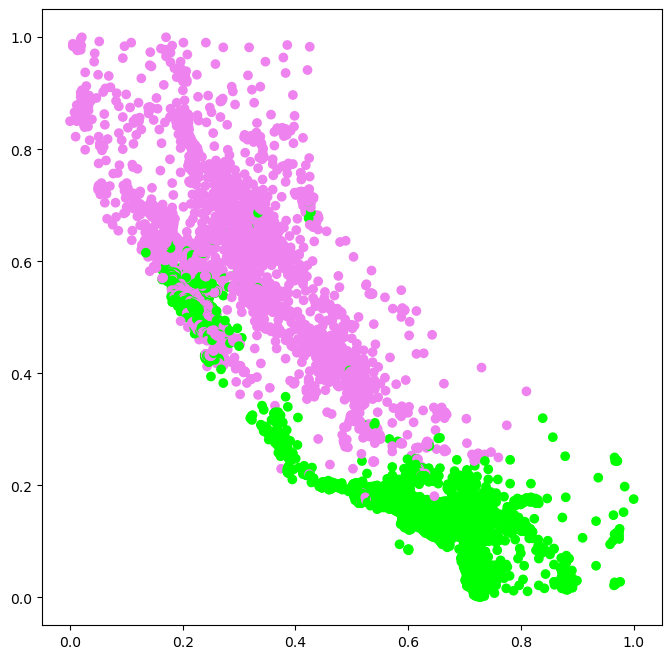

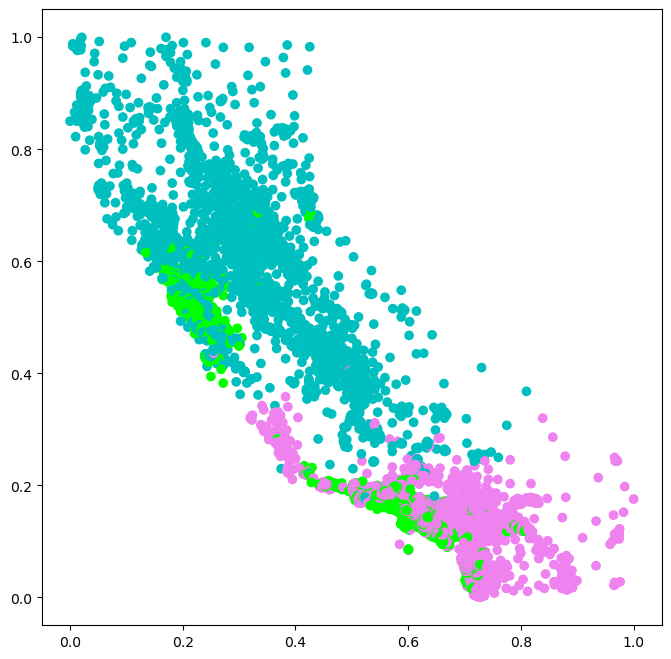

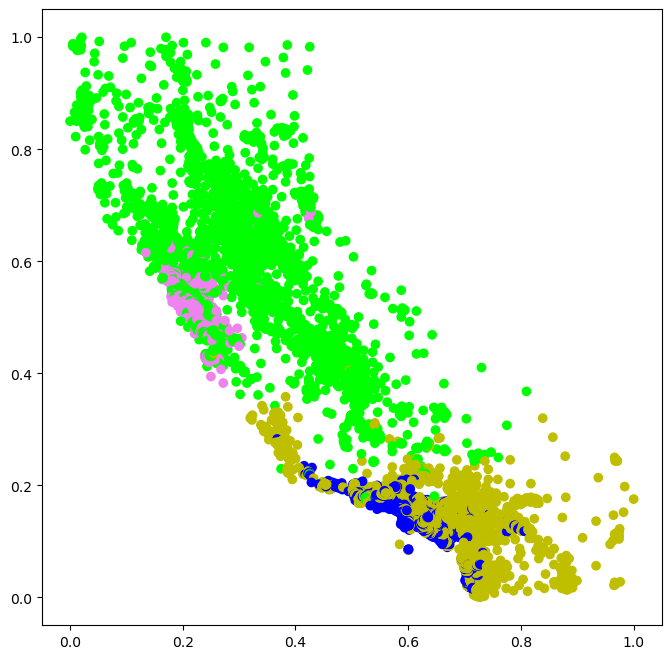

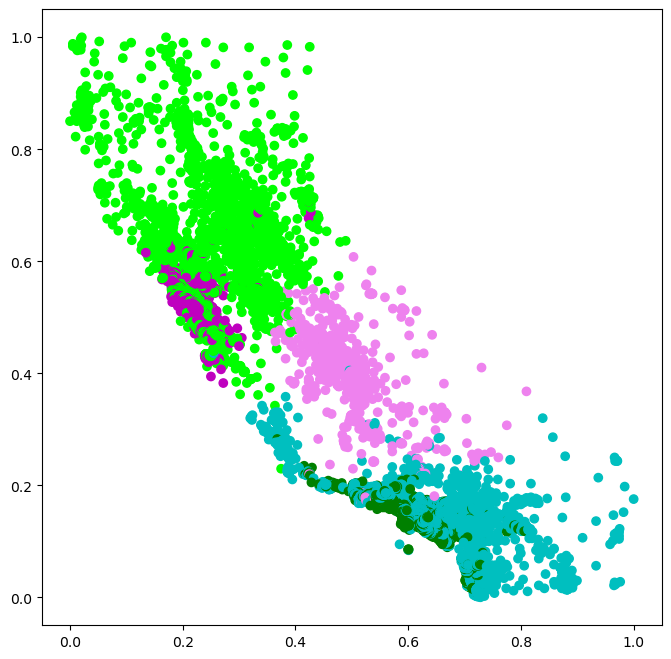

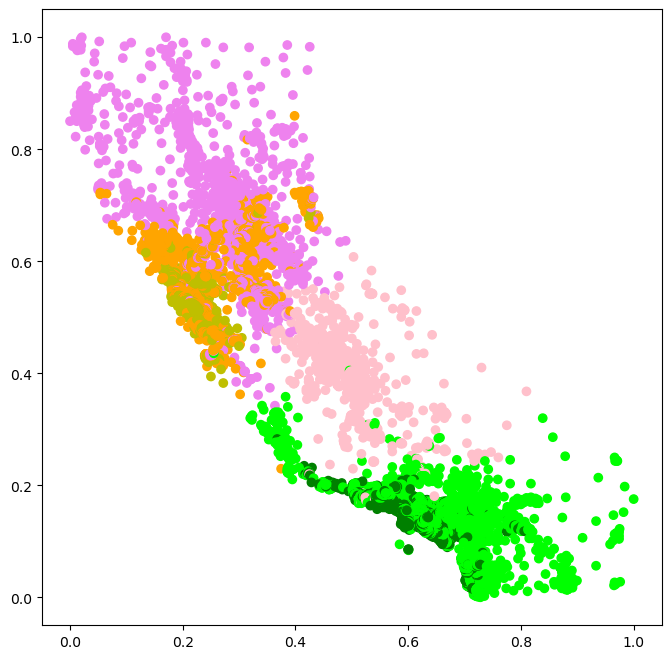

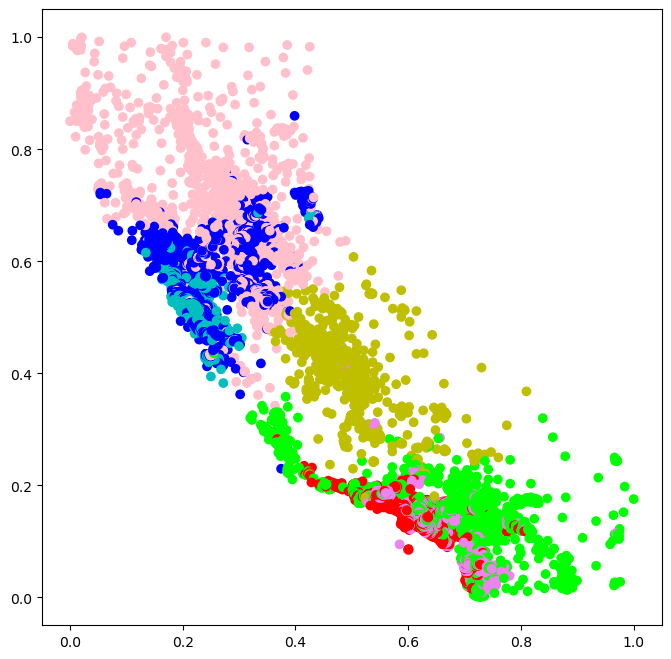

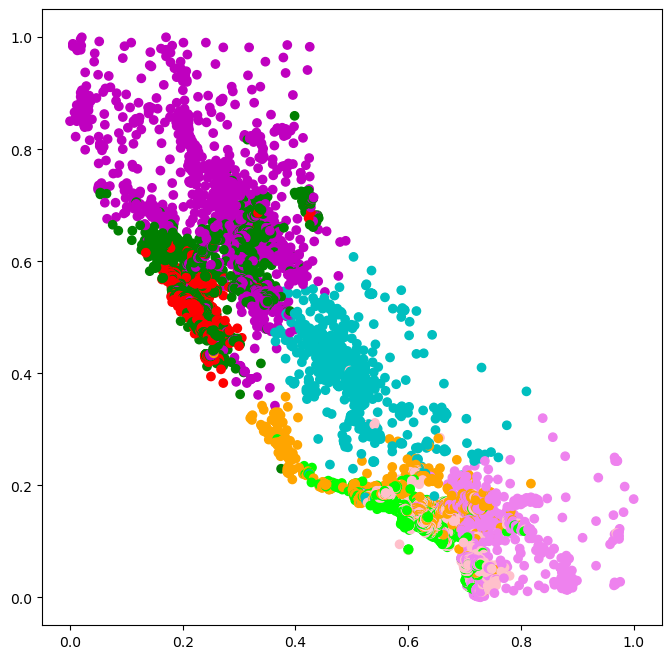

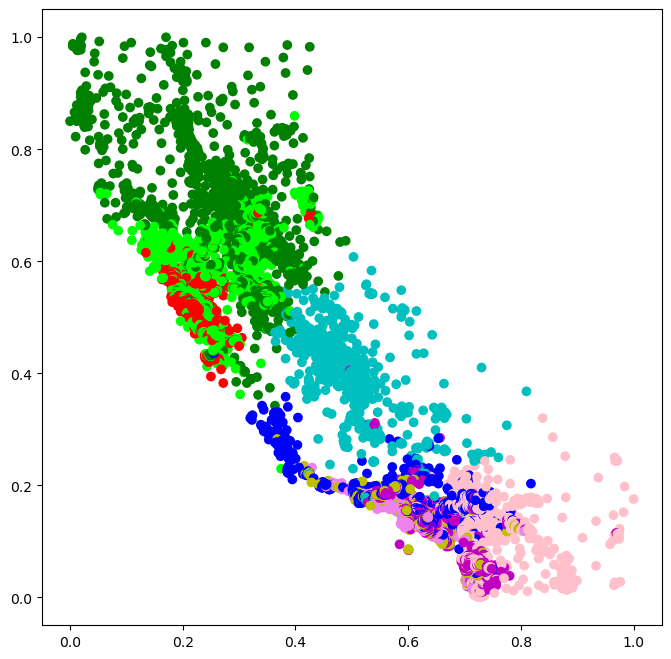

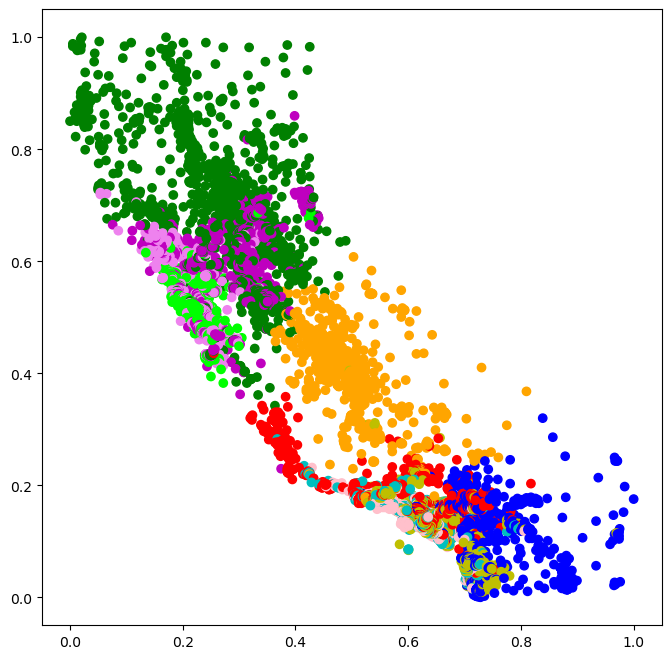

In [26]:
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    ag.fit(df_no_ocean_minnmax)
    plot_clusters2(df_no_ocean_minnmax.values, ag.labels_)
    davies_boulding[k-2] = davies_bouldin_score(df_no_ocean_minnmax, ag.labels_) 


Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

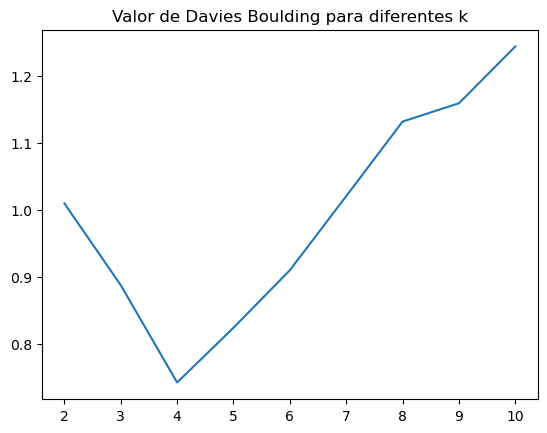

In [27]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Observamos que nos sale que el número óptimo de clusters es 4. Vamos a agrupar los datos originales mediantes los clusters obtenidos aplicando el algoritmo jerárquico aglomerativo a los datos reescalados. De esta manera, podremos interpretarlos con una mayor facilidad. A su vez, añadiremos de nuevo el diagrama de dispersión que genera el algortimo jerárquico aglomerativo sobre los datos reescalados por MinMax y un número de clusters óptimo, que en este caso es 4, para facilitarnos el estudio y comprensión de los datos. A su vez, sacamos los datos estadísticos resultantes de la agrupación por clusters y los interpretamos. 

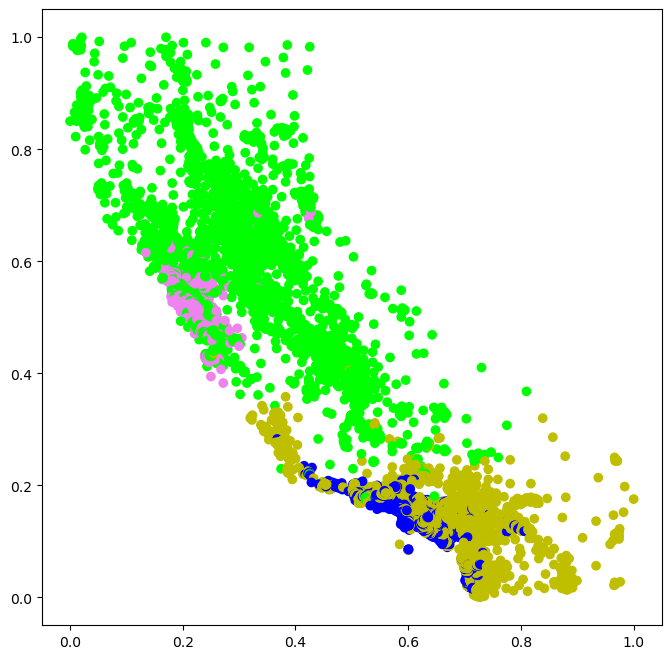

In [43]:
ag = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
ag.fit(df_no_ocean_minnmax)
plot_clusters2(df_no_ocean_minnmax.values, ag.labels_)

In [44]:
df_copia = df_no_ocean_minnmax.iloc[0:,].copy()

ej5 = pd.DataFrame(data=df_copia, columns=['longitude (minmax)', 'latitude (minmax)', 'population (minmax)', 'median_income (minmax)', 'median_house_value (minmax)'])
ej5 = ej5.assign(cluster=pd.Series(data=ag.labels_))

df_copia2 = df_no_ocean.iloc[0:,].copy()
df_copia2['cluster'] = ej5['cluster']

df_copia2.groupby(["cluster"]).describe().transpose()

cluster                               0              1              2  \
longitude          count    7767.000000    1827.000000    9423.000000   
                   mean     -121.399961    -118.209113    -117.932964   
                   std         1.193635       0.527572       0.794640   
                   min      -124.350000    -120.670000    -121.790000   
                   25%      -122.210000    -118.430000    -118.290000   
                   50%      -121.750000    -118.320000    -118.040000   
                   75%      -120.930000    -117.920000    -117.360000   
                   max      -116.220000    -116.260000    -114.310000   
latitude           count    7767.000000    1827.000000    9423.000000   
                   mean       37.855334      33.895074      33.844943   
                   std         1.182838       0.368456       0.521445   
                   min        33.760000      32.630000      32.540000   
                   25%        37.300000      33.760000      33.760000   
                   50%        37.790000      34.000000      33.960000   
                   75%        38.520000      34.130000      34.100000   
                   max        41.950000      35.300000      36.640000   
population         count    7767.000000    1827.000000    9423.000000   
                   mean     1298.249646    1325.011494    1575.971665   
                   std      1004.690462    1199.702557    1228.894402   
                   min         9.000000      15.000000       3.000000   
                   25%       717.000000     716.000000     883.000000   
                   50%      1072.000000    1033.000000    1291.000000   
                   75%      1587.500000    1521.000000    1895.500000   
                   max     16305.000000   16122.000000   35682.000000   
median_income      count    7767.000000    1827.000000    9423.000000   
                   mean        3.302793       6.605841       3.476427   
                   std         1.304359       2.485432       1.291496   
                   min         0.499900       0.499900       0.499900   
                   25%         2.327300       5.000000       2.503100   
                   50%         3.125000       6.302100       3.354200   
                   75%         4.125000       7.821700       4.304750   
                   max        10.594100      15.000100      12.538100   
median_house_value count    7767.000000    1827.000000    9423.000000   
                   mean   148223.856830  424384.244116  182927.422265   
                   std     72242.176264   69511.039113   65894.739585   
                   min     14999.000000  275000.000000   17500.000000   
                   25%     87500.000000  359000.000000  136250.000000   
                   50%    134100.000000  429300.000000  175700.000000   
                   75%    201850.000000  500001.000000  225950.000000   
                   max    361100.000000  500001.000000  387500.000000   

cluster                               3  
longitude          count    1416.000000  
                   mean     -122.192097  
                   std         0.287087  
                   min      -123.000000  
                   25%      -122.430000  
                   50%      -122.220000  
                   75%      -122.020000  
                   max      -119.840000  
latitude           count    1416.000000  
                   mean       37.587592  
                   std         0.338280  
                   min        36.140000  
                   25%        37.370000  
                   50%        37.600000  
                   75%        37.800000  
                   max        39.190000  
population         count    1416.000000  
                   mean     1243.826977  
                   std       896.636362  
                   min         8.000000  
                   25%       723.750000  
                   50%      1072.000000  
                   75%      1527.250000 

Se procederá a realizar un análisis de los datos recopilados.

En primer lugar, se destaca que el diagrama de dispersión previamente exhibido coincide con la cartografía de California. Se llevará a cabo una comparación entre el diagrama de dispersión previo y el mapa geográfico auténtico de California para poder asociar cada clúster con una región californiana específica. Se observa que el Cluster0 (representado en verde) se corresponde con la región norte del interior de California. Esta área puede ser identificada como la ciudad de Sacramento, la cual es la capital de California, y sus alrededores. A su vez, al comparar el diagrama de dispersión con el mapa auténtico, se identifica el Cluster1 (en azul) como la zona costera de Los Ángeles. El Cluster2 (en marrón) se asocia con la región interior del sur de California, es decir, los alrededores de Los Ángeles; ciudades como San Diego o Barstow. Por último, se identifica el Cluster3 (en rosa) con la zona de la Bahía de San Francisco.

Una vez identificados los clústeres con sus respectivas regiones geográficas de California, se procederá a continuar el estudio de los datos restantes.

En cuanto a la población que reside en cada manzana, se observa que las zonas interiores son las que presentan las medias más altas de población. Encabeza esta clasificación la región de las afueras de Los Ángeles (Cluster2). Esto se debe a que de los 3,8 millones de habitantes registrados en el condado de Los Ángeles, la gran mayoría se sitúa en las afueras y en las zonas interiores, ya que como se detallará a continuación, estas regiones son mucho más asequibles en cuanto a precios se refiere. Seguidamente se encuentra el Cluster1, correspondiente a la ciudad de Los Ángeles, seguido del Cluster0 (Sacramento) y finalmente del Cluster3, correspondiente a la ciudad de San Francisco. Resulta sorprendente observar que la zona interior de Sacramento, a pesar de ser la capital y la más extensa en cuanto a clústeres, presenta una densidad de población por manzana menor que la ciudad de Los Ángeles, que es considerablemente menos extensa geográficamente (Cluster1).

Se prosigue el estudio realizando un análisis acerca del ingreso medio por hogar en cada manzana. Se observa que, como era de esperar, las dos zonas con las medias de ingresos más altas son los Cluster1 y Cluster3, correspondientes a las ciudades de Los Ángeles y San Francisco respectivamente. Estos datos reflejan fielmente la realidad, ya que estas son las zonas donde residen las personas más influyentes del mundo. Se evidencia una clara disparidad con respecto a las zonas interiores, donde las medias de ingresos en los Cluster0 y Cluster2 descienden un 50%.

Para finalizar el análisis, se estudia el valor medio de la vivienda por manzana. Se observan resultados que concuerdan con los datos de ingresos medios por hogar, ya que las zonas de Los Ángeles y San Francisco son las que presentan el valor medio de la vivienda más elevado, casi tres veces superior al de las zonas de Sacramento y las afueras de Los Ángeles. Es evidente que un hogar en la playa de Santa Mónica es considerablemente más costoso que uno en las afueras de Sacramento. Además, estos resultados pueden relacionarse con la concentración de población en las zonas interiores de California, dado que son mucho más asequibles.

Aunque no se especifique en el enunciado, a continuación mostramos el dendrograma.

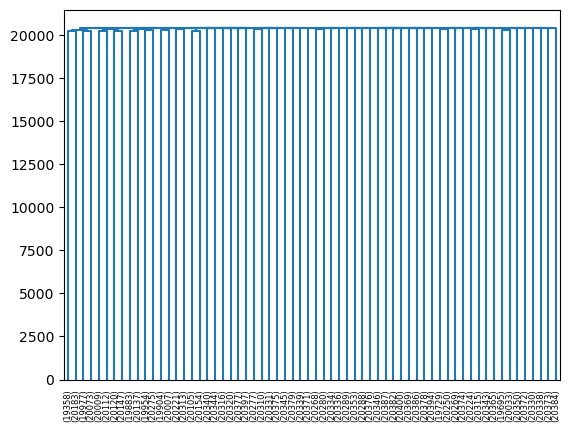

In [23]:
# Sciki-learn no pinta el dendrograma, pero scipy sí, 
# la siguiente función permite usar el modelo ajustado por scikit learn para pintar el dendrograma
# https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    

ag = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
ag.fit(df_no_ocean_minnmax)

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level')

# Árbol completo
#plot_dendrogram(ag)